# Les modèles de ségrégation 

Projet d'informatique réalisé par Victor Huynh et Solène Blasco Lopez.


# Résumé

Notre projet de programmation a pour but de créer des algorithmes en langage Python simulant différents types de ségrégation. Nous avons procédé de la manière suivante : nous avons tout d’abord étudié deux modèles connus, qui ont été mentionnés dans le cadre du cours de Physique statistique des sciences sociales : celui de **Schelling**, portant sur la ségrégation raciale, puis celui de **Grauwin** et **Jensen**, sur la ségrégation spatiale. Ensuite, nous avons codé des programmes Python simulant les dynamiques décrites par ces modèles. Nous avons alors étudié les résultats obtenus, et y avons porté un regard critique pour proposer des pistes d’améliorations possibles. 

Le premier modèle implémenté est le modèle de ségrégation sociale de **Schelling**, l’un des plus connus et qui est très largement réutilisé en économie, en sociologie mais aussi en théorie des jeux. Ce dernier a été développé par Thomas Schelling, économiste américain, de 1971 à 1978. Le modèle de Schelling aboutit à la création spontanée d’un ordre, en partant d’une situation initialement en désordre, sans qu’aucun projet centralisé ne contrôle cette évolution. L’ordre établi résulte en effet de décisions individuelles, motivées par un désir d’être plus ou moins entouré par ses semblables, et non coordonnées. Ces résultats reproduisent les observations de certaines villes des Etats-Unis par exemple, mais ne permettent toutefois pas d’en expliquer les causes.
Le modèle de Schelling repose sur une conception assez simpliste, avantage facilitant son étude. Néanmoins, cette simplicité peut aussi remettre en cause le réalisme de ce modèle : on considère des individus identiques, qui réalisent à chaque pas de temps une action guidée uniquement par un paramètre de tolérance, alors que dans la réalité, de nombreux autres facteurs interviennent. 

Le second modèle implémenté, inspiré du modèle de Schelling, est un modèle de ségrégation spatiale qui a été développé par **Jensen** et **Grauwin** en 2009. 
On considère cette fois une population se répartissant dans une ville divisée en quartiers. Leurs choix de déménagements suivent une loi de logit, influencée par leur préférence pour des quartiers moyennement peuplés, et leur réticence à quitter leur quartier actuel (à cause de leurs amis, leur travail, …). Après avoir implémenté ce modèle, nous avons représenté l’évolution d’une ville, et étudié le rôle des paramètres intervenant dans le choix des individus sur l’état final d’une ville. La répartition optimale souhaitée pour le bien-être des individus est une répartition homogène.
Ce modèle met à mal le principe de Main Invisible de Smith, en montrant la possible création d’un déséquilibre général de manière involontaire. Avec certains paramètres, la création d’une ségrégation pouvait être observée, avec concentration de la population dans un petit nombre de quartiers. Dans ce cas, c’est avec l’ajout d’une minorité agissant en vue d’un ordre général, qui coordonne les déplacements des individus, qu’une répartition homogène était rétablie. Le modèle de Grauwin et Jensen a l’avantage d’être plus complexe dans son principe : il prend en compte d’autres contraintes liées à l’ancrage des individus dans leur quartier, la rationalité de leurs choix, et ne systématise pas leurs déménagements, à l’aide d’une loi de logit. Cependant, tout comme le modèle de Schelling, il représente des individus identiques et n’interagissant pas entre eux.




# Modules utilisés



Tout au long de notre projet, nous allons utiliser les modules suivant :

In [0]:
# Pour l'implémentation des modèles :
import numpy as np 
from random import randint
from numpy.random import binomial
from numpy.random import multinomial
from math import exp

# Pour réaliser des tests unitaires sur nos fonctions :
import unittest

# Pour les représentations et les graphiques, on utilise principalement : 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import seaborn as sns # librairie qui nous a été recommandée par M. Choffin


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# I. Ségrégation sociale - le modèle de Schelling

Le modèle de Schelling a été introduit dans les années 1960, pour rendre compte de la ségrégation sociale aux Etats-Unis. 

On considère ainsi une ville aléatoirement peuplée de deux catégories d'individus, qui s'ils sont insatisfaits, déménagent aléatoirement vers un lieu qui les satisfera. Dans le modèle de Schelling, la satisfaction d'un agent dépend du nombre d'agents de sa catégorie dans son voisinage. 



> Les programmes présentés dans cette section pourront être trouvés dans le dossier `Schelling`.

## 1. Implémentation du modèle

Dans le modèle de Schelling, on considère une population divisée en deux classes dans une ville. Pour le moment, on considère deux classes: les blancs et les noirs. En effet, plusieurs événements au cours des derniers siècles aux Etats-Unis, allant de l'exclusion des noirs dans la vie sociale et les lieux publiques, passant par les actions du Ku Klux Klan, jusqu'à la tuerie de Charlottesville (symbole des violences policières contre les populations noires) laissent penser que les tensions ethniques les plus fortes sont celles entre ceux deux classes. Ensuite, on représente simplement la ville par une grille rectangulaire.


### a) Définition des paramètres

On considère une ville de taille $n * p$. On modélise cette ville par une matrice de taille $n*p$. On la remplit avec des chiffres allant de $0$ à $2$ : $0$ représente un emplacement vide, $1$ représente une famille blanche et $2$ représente une famille noire. Dans le modèle originel de Schelling, on considère qu'il y a autant de blancs que de noirs dans notre ville, donc il est judicieux de remplir aléatoirement la matrice selon la loi uniforme $\mathcal{U}([\![0,2]\!])$.

La fonction `ville` réalise cela:

In [0]:
def ville (n,p): 
    ville = np.random.randint(0,3,(n,p)) 
    return(ville)

La satisfaction d'un ménage est binaire: on se fixe un ménage de position $(i,j)\in[\![0,n-1]\times[0,p-1]\!]$ dans la ville, et on note $fd_{i,j}$ la fraction de ménages de classe différente dans son voisinage (qui sont 8 au maximum): $fd_{i,j} = \frac{D_{i,j}}{D_{i,j}+S_{i,j}}$.

$D_{i,j}$ est le nombre de ménages de classe différente de l'agent $(i,j)$.

$S_{i,j}$ est le nombre de ménages de même classe que l'agent $(i,j)$.

On peut aussi alternativement introduire la fraction de ménages voisins semblables au ménage $(i,j)$ $fs_{i,j} = \frac{S_{i,j}}{D_{i,j}+S_{i,j}}$, qui vérifie $fd_{i,j} + fs_{i,j} = 1$. En effet, on se rendra plus tard compte que coder le calcul de $fs_{i,j}$ est plus simple : on déduira alors $fd_{i,j} = 1 - fs_{i,j}$.

Chaque ménage $(i,j)$ possède un seuil de tolérance $T_{i,j} \in [0,1]$: 
il est satisfait si et seulement si $fd_{i,j} ≤ T_{i,j}$.

---


A chaque étape, on choisit au hasard un ménage $i$, on mesure sa satisfaction en calculant sa fréquence $f_{i}$ associée définie ci-dessus.


- S'il est mécontent, i.e. si  $fd_{i,j} > T_{i,j}$, alors il envisage de déménager vers un emplacement inhabité $(k,l)$: si $fd_{k,l} ≤ T_{i,j}$, alors le ménage $(i,j)$ déménage à l'emplacement $j$, laissant l'emplacement $(k,l)$ vide.
- S'il est satisfait du voisinage de son logement, i.e. si $fd_{i,j} ≤ T_{i,j}$, alors il y reste.

Par abus de définition, $fd_{k,l}$ représente la fraction de ménages de classe différente voisins du ménage $(i,j)$ s'il vivait à l'emplacement vide $(k,l)$.

Pour alléger notre modèle et obtenir des résultats plus rapidement, on va tout d'abord considérer que tous les citoyens de la ville ont le même seuil de tolérance: $\forall(i,j)\in[\![ 0,n-1 ]\times[ 0,p-1 ]\!],   T_{i,j} = T $, où $T \in [0,1]$. 

### b) Initialisation et principe d'itération du modèle

Programmons maintenant en langage Python le processus que nous venons de décrire.

Pour commencer, il va falloir, lorsque l'on a choisi un ménage $(i,j)$, calculer la fréquence $fd_{i,j}$ d'individus de classe différente autour de lui. La fonction `fréquence` permet cela:


In [0]:
def frequence (ville, i, j) :
#ville désigne la matrice représentative de la ville.
#i désigne l'indice de la ligne du ménage qu'on étudie, entre 0 et n-1.
#j désigne l'indice de la colonne du ménage qu'on étudie, entre 0 et p-1.

    ''' 
    On utilise les notations : 
        effectif : nombre de ménages voisins de même classe que (i,j)
        total : nombre de ménages voisins quelconques de (i,j)
        f : fraction de voisins différents de (i,j)
    '''

    n,p = np.shape(ville)
    
    voisinage = ville [max(0,i-1) : min(n,i+2) , max(0,j-1) : min(p,j+2)]
    #On extrait de notre ville le voisinage du ménage (i,j) dans la variable "voisinage", 
    #c'est-à-dire la sous-matrice de "ville" qui contient ville[i,j] ainsi que les (au plus 8) 
    #coefficients adjacents. L'utilisation des fonctions min et max nous permettent de ne pas
    #obtenir de message d'erreur lorsque l'on prend des valeurs extrêmes de i et j (i.e. un ménage
    #situé à la frontière de la ville).
    
    effectif = np.sum(voisinage==ville[i,j]) - 1 
    #effectif compte le nombre de coefficients égaux à ville[i,j] dans ce voisinage, afin de 
    #compter le nombre de voisins de (i,j) qui sont de même classe que lui. 
    #On retire 1 car l'individu (i,j) fait partie de ce voisinage, il ne faut pas le compter !

    total = np.sum(voisinage!=0) - 1 
    #total compte le nombre de coefficients différents de 0 (qui signifie espace vide) dans ce 
    #voisinage, afin de compter le nombre de voisins quelconques de (i,j).
    #Pour la même raison qu'avant, on retire 1
    
    if total != 0 :
        f = 1 - (effectif/total)
    #Si le ménage possède effectivement des voisins, on calcule la fraction de voisins de même
    #classe et on en déduit celle de voisins de classe différente. 
    else :
        f = 0
    #Si le ménage n'a aucun voisin, il n'a aucun voisin de classe différente en particulier,
    #donc on a bien f=0.

    return f


La fonction suivante s'inspire de la précédente, et va permettre à un ménage de déterminer si le lieu de déménagement envisagé $(k,l)$ correspond à ses attentes ou non en calculant la fraction de ménages voisins étrangers qu'il aurait en cas de déménagement: 

In [0]:
def habitatconforme (ville, k, l, c) :
#ville désigne la matrice représentative de la ville.
#k désigne l'indice de la ligne de l'espace inhabité qu'on étudie, entre 0 et n-1.
#l désigne l'indice de la ligne de l'espace inhabité qu'on étudie, entre 0 et p-1.
#c désigne le numéro de classe du ménage qui envisage de déménager, donc c!=0.

    '''
    On réadapte les notations précédemment introduites: 
        effectif : nombre de voisins de classe c de l'emplacement (k,l).
        total : nombre d'espaces habités autour de l'emplacement (k,l).
        f : fraction de voisins qui ne sont pas de classe c de l'emplacement (k,l).
    '''

    n,p = np.shape(ville)
    
    voisinage = ville [max(0,k-1) : min(n,k+2) , max(0,l-1) : min(p,l+2)]
    #On extrait de notre ville le voisinage de l'emplacement (k,l) dans la variable "voisinage",
    #avec la même méthode que précédemment.

    effectif = np.sum(voisinage==c)  
    #Cette fois, pas besoin d'enlever 1 car l'emplacement (k,l) considéré est vide et ne sera pas 
    #compté puisque l'on choisit c != 0 !
    total = np.sum(voisinage!=0)  #Pour la même raison, pas besoin d'enlever 1
    
    if total != 0 :
        f = 1 - (effectif/total)
    else :
        f = 0
    
    return f


> La fonction `habitatconforme` fonctionne selon un principe semblable à celui de la fonction précédente: elle prend en paramètres la ville, la position $(k,l)$ de l'espace vide, et la classe de l'individu qui l'envisage $c$. Elle calcule alors la fréquence $f_{k,l}$ de voisins étrangers qu'aurait le ménage de classe c s'il déménageait à l'emplacement $(k,l)$.

> Ce n'est que très tard dans ce projet que nous avons trouvé cette méthode efficace de calcul de fréquence, appliquable partout dnas la ville.

> Une ancienne version de notre travail est trouvable dans le fichier `Version avec frontière.py`, avec des fonctions de calcul de fréquence aussi courtes, mais qui ne permettaient que de calculer des fréquences de voisins d'un ménage strictement à l'intérieur de la ville. On alors devait sacrifier un peu de la justesse de notre modèle, en faisant le choix de :

- Modéliser la ville avec sa frontière extérieure d'épaisseur $1$ par une matrice de taille $(n+2)*(p+2)$: ainsi, lorsque l'on prenait n'importe quel ménage dans l'intérieur de la ville, on pouvait calculer la fréquence de voisins étrangers autour de lui sans problème. 
- Ne mettre aucun espace vide en frontière, ce qui serait en quelque sorte de la "triche". En effet, si un ménage envisageait de déménager vers un espace vide situé à la frontière, il aurait fallu calculer une fréquence en frontière, opération que l'on ne pouvait pas faire.

> Une version moins ancienne peut être trouvée dans `Version très longue.py`. Dans celle-ci, on a trouvé une manière de coder des fonctions qui nous permettaient de calculer des fréquences même en frontière, mais qui étaient très très longues. 

Une autre fonction qui nous sera utile consiste en échanger la position de deux éléments au sein d'une même matrice. Elle permettra de modéliser le déménagement d'un ménage:

In [0]:
def swap(u,a,b,c,d): 
    u[a,b],u[c,d] = u[c,d],u[a,b]
    return(u)

Muni de ces trois fonctions, on peut alors coder une itération du processus, qui consiste à choisir au hasard un ménage dans la ville, voir s'il est satisfait de son voisinage, et sinon, le faire envisager un déménagement:

In [0]:
def iteration(ville,T):
    n,p = np.shape(ville)[0], np.shape(ville)[1]
    i , j = randint(0,n-1) , randint(0,p-1)
    #i et j seront les indices de position du ménage qu'on étudiera. 
    k , l = randint(0,n-1) , randint(0,p-1)
    #k et l seront les indices de position des logements que le ménage envisagera s'il est mécontent.

    '''
    On va introduire deux variables qui vont alléger la complexité de notre programme: elles
    correspondent à des seuils maximums d'opérations qu'on s'autorise dans notre programme. La 
    seconde permet même le bon fonctionnement de notre fonction (je vous explique ça en dessous).
    '''
    nombre_operations1 = 0
    #Variable qui comptera le nombre de recherches de ménages dans la ville.
    nombre_operations2 = 0
    #Variable qui comptera le nombre de logements que le ménage aura envisagé, s'il est insatisfait.

    while ville[i,j] == 0 and nombre_operations1 < 50 :
      i , j = randint(0,n-1) , randint(0,p-1)
      nombre_operations1 = nombre_operations1 + 1
    #On choisit aléatoirement un espace (i,j) dans notre ville, jusqu'à ce qu'on tombe sur un 
    #emplacement habité par un ménage, d'où la boucle "while". Si jamais on prend 

    if frequence(ville,i,j)>T: 
    #Cas où le ménage est mécontent de son voisinage.

        while (ville[k,l] != 0 or habitatconforme(ville,k,l,ville[i,j]) >= T) and nombre_operations2 < 50 :
            k , l = randint(0,n-1) , randint(0,p-1)
            nombre_operations2 = nombre_operations2 + 1
        #Cette boucle "while" permet de trouver un espace vide qui plaira au ménage mécontent.
        #La première condition permet de trouver un espace vide.
        #La seconde condition permet à cet espace vide d'être satisfaisant.
        #La troisième permet de stopper la boucle si on ne trouve pas de lieu vide adapté:
        #au bout d'un certain moment, le ménage en aura marre de chercher un nouveau logement.

        if habitatconforme(ville,k,l,ville[i,j]) < T:
            swap(ville,i,j,k,l)
        #On constitue cette boucle "if" pour déclencher le déménagement si et seulement si la 
        #boucle "while" a effectivement trouvé un logement satisfaisant pour le ménage.

    return(ville)

> La condition concernant le seuil d'opérations de la deuxième boucle "while" est très importante. Grâce à elle, on est sûrs de ne pas se retrouver piégés dans une boucle infinie. En effet, avant de l'implémenter, au bout d'un grand nombre de simulations, lorsque l'on prenait un seuil de tolérance faible, il n'y avait plus aucun de logement libre satisfaisant pour qui se ce soit, donc cette boucle tournait indéfiniment.

> De base, on avait fixé ce seuil d'opérations à $np.size(u)$, qui vaut $4000$ dans notre simulation avec $(n,p)=(50,80)$ : cependant, on s'est rendu compte que cela était très coûteux en temps. De plus, on s'est dit que si un ménage souhaitait réellement déménager, il serait peu probable qu'il ait le temps de se renseigner sur 4000 logements. C'est pourquoi on a finalement fixé ce seuil à $50$. 

> On a aussi eu l'idée de fixer ce même seuil pour la première boucle "while" qui recherche un ménage dans la ville, afin d'être plus économe.

La fonction `schelling` qui suit permet de réaliser une simulation. Elle prend en argument la taille de la ville qu'on souhaite créer qui est caractérisée par $n$ et $p$, le seuil de tolérance $T$ des habitants qui y vivent ainsi que le nombre d'itérations $n\_iter$ que l'on souhaite réaliser dans cette ville:

In [0]:
def schelling (n,p,T,n_iter) :  
    ma_ville = ville (n,p)
    for i in range(n_iter) :
        iteration(ma_ville,T)

### c) Tests unitaires

Afin de vérifier le bon fonctionnement des fonctions réalisées précédemment, nous avons choisi de créer un test unitaire qui porte sur une ville de taille $6*6$ dont le seuil de tolérence vaut $T=\frac{1}{2}$. On l'appelle `test_iteration`: 

- Il crée la ville de taille $6*6$ et affiche la répartition de ses habitants.
- Il y cherche un individu blanc mécontent: cela revient à chercher un élément dans l'intérieur de la matrice qui vaut $1$, et dont la proportion de voisins noirs (de $2$) est strictement supérieure à $\frac{1}{2}$. 
- Il cherche ensuite un emplacement vide dans la ville (un $0$) dans lequel il acceptera de déménager.
- Il le fait déménager, et montre la nouvelle répartition des habitants dans la ville: on observe un échange de place entre un $0$ et un $1$, qui représente le déménagement d'un habitant blanc mécontent.


In [0]:
def test_iteration():
    u1=ville(6,6)
    u2=np.copy(u1)
    i, j= randint(0,5), randint(0,5)
    k, l= randint(0,5), randint(0,5)
    print("La répartition des habitants avant déménagement est")
    print(u1)

    while u2[i,j] != 1 or frequence(u2,i,j) <= 1/2:
        i, j = randint(0,5), randint(0,5)
    while u2[k,l] != 0 or habitatconforme(u2,k,l,u2[i,j]) > 1/2:
        k, l = randint(0,5), randint(0,5) 
    swap(u2,i,j,k,l)
    print("La répartition des habitants après déménagement est")
    print(u2)
    print("Le déménagement a-t-il bien eu lieu?",sum(sum(u1==u2)) != np.shape(u1)[0]*np.shape(u1)[1])
    print("Le ménage i=",k,"j=",l,"a déménagé vers l'espace k=",i,"l=",j,".")
    #Lettres inversées car le déménagement a déjà eu lieu.

test_iteration()

La répartition des habitants avant déménagement est
[[1 2 0 0 0 0]
 [1 2 2 2 1 1]
 [1 1 0 0 2 0]
 [0 2 0 1 1 1]
 [0 0 2 2 0 1]
 [2 1 1 1 1 1]]
La répartition des habitants après déménagement est
[[1 2 0 0 0 0]
 [1 2 2 2 1 1]
 [1 1 0 0 2 0]
 [0 2 0 1 1 1]
 [0 0 2 2 1 1]
 [2 0 1 1 1 1]]
Le déménagement a-t-il bien eu lieu? True
Le ménage i= 4 j= 4 a déménagé vers l'espace k= 5 l= 1 .


Voici un autre test unitaire alternatif, qui reprend directement la fonction `iteration`, et qui vérifie qu'un déménagement a bien événtuellement lieu, toujours avec $T=\frac{1}{2}$ :



In [0]:
def test_iterationalternatif():
    ville1=ville(6,6)
    copie_ville=np.copy(ville1)
    #Permet de copier "ville1" sans qu'il y ait dépendance entre l'original et la copie.
    nombre_iterations_nécessaires = 0
    test=True 

    while test:
    #Boucle "while" qui s'arrêtera lorsque lorsque "test" deviendra "False"
        iteration(ville1,1/2)
        test = (sum(sum(ville1==copie_ville)) == np.shape(ville1)[0]*np.shape(ville1)[1])
        nombre_iterations_nécessaires = nombre_iterations_nécessaires + 1
    #sum(ville1==copie_ville) affiche une matrice de taille np.shape(ville1)[0]*np.shape(ville1)[1]:
    #son coefficient d'indices (p,q) vaut 1 si les coefficients d'indices (p,q) des matrices ville1
    #et copie_ville sont égaux, et 0 sinon. La somme de ses coefficients est donnée par 
    #sum(sum(ville1==copie_ville). Tant que le déménagement n'a pas lieu, celle-ci vaut alors
    #np.shape(ville1)[0]*np.shape(ville1)[1], car tous ses coefficients valent 1. Simuler un 
    #déménagement revient à échanger la position de deux coefficients dans ville1: dès qu'il a lieu, 
    #on a alors sum(sum(ville1==copie_ville)) = np.shape(ville1)[0]*np.shape(ville1)[1] - 2. 
    #"test" devient False, et la boucle s'arrête.

    print("La répartition des habitants avant déménagement est")
    print(ville1)
    print("La répartition des habitants après déménagement est")
    print(copie_ville)
    print("Le déménagement a-t-il bien eu lieu?",test != True)
    
    (i,j),(k,l) = np.argwhere((ville1==copie_ville)==False)
    print("Le déménagement a eu lieu entre i=",i,"j=",j,"et k=",k,"l=",l,".")
    print("Il a fallu",nombre_iterations_nécessaires,"itérations.")

test_iterationalternatif()


La répartition des habitants avant déménagement est
[[2 0 0 2 1 2]
 [1 0 0 2 1 2]
 [1 0 1 2 0 2]
 [2 0 2 1 0 0]
 [1 1 1 1 2 0]
 [1 0 1 1 0 0]]
La répartition des habitants après déménagement est
[[2 0 0 2 1 2]
 [1 0 0 2 1 2]
 [1 0 1 2 0 2]
 [2 0 2 1 0 1]
 [1 1 0 1 2 0]
 [1 0 1 1 0 0]]
Le déménagement a-t-il bien eu lieu? True
Le déménagement a eu lieu entre i= 3 j= 5 et k= 4 l= 2 .
Il a fallu 2 itérations.


### d) Terminaison et complexité

- Coût en mémoire: 

D’un point de vue mémoriel, la simulation d'une ville de taille $n*p$ nécessite la création d’une matrice de taille $n*p$ pour la représenter.

Ensuite, la fonction `itération` modifie directement cette matrice en cas de déménagement. On conserve alors la même matrice tout le long de notre simulation. 

Ainsi, le coût en mémoire de notre algorithme est de : $\fbox{$n*p$} $ . Ce coût est indépendant du nombre d’itérations que l’on veut effectuer.

- Coût en temps: 

  - Le nombre d'opérations des fonctions `fréquence` et `habitatconforme` est de l'ordre de $\fbox{$O(1)$}$ . En effet, il est borné, et ne dépend pas des paramètres d'entrée, car on aura toujours au plus 8 voisins.

  - De même, la complexité de la fonction `swap` est de l'ordre de $\fbox{$O(1)$}$ : en effet, elle effectue un nombre fini d'opérations, qui correspond à l'échange de place entre deux coefficients. 

  - La fonction `itération` cherche un ménage d'abord un ménage dans ma ville à l'aide d'une boucle "while". Dans le pire des cas, cette boucle fera 50 répétitions (seuil que nous nous sommes donnés) d'un nombre fini d'opérations. Ensuite, si le ménage trouvé est insatisfait, elle lui cherchera un logement plaisant: nous avons fixé dans notre fonction le seuil de recherches de logement à 50, et chaque recherche de logement correspond à un nombre fini d'opérations. Ainsi, la complexité de la fonction `itération` est de l'ordre de $\fbox{$O(1)$}$ .

  - Ensuite, l'algorithme consiste à répéter la fonction précédente avec la fonction `simulation` un nombre $n\_iter$ de fois, donc la complexité est de l'ordre de $\fbox{$O(n\_iter)$}$ .

- Bilan:  

Une simulation complète du modèle de Schelling à l'aide de nos programmes consiste à créer une ville, puis effectuer le nombre d'itérations voulues $n\_iter$. Ainsi, le coût total d'une simulation est $\fbox{$O(n\_iter  + n*p)$}$ .

 




La fonction suivante `cout_n_iter` nous permet de représenter graphiquement le temps que prend notre simulation en fonction du nombre d'itérations et des paramètres qu'on expliquera plus tard. On effectue une régression linéaire pour avoir une tendance générale.

In [0]:
#Modules nécessaires pour cette fonction
from time import time
from sklearn.linear_model import LinearRegression

def cout_n_iter () :
    n = 50
    p = 80
    T = 1/2
    x=[]  #Contiendra les différentes valeurs de n_iter testées.
    y=[]  #Contiendra le temps d'execution associé.
    for n_iter in range(1,5000,5) :
        x.append(n_iter)
        t=time() #t prend pour valeur l'heure avant simulation.
        schelling(n,p,T,n_iter) 
        #On effectue une simulation avec n_iter itérations et les autres paramètres choisis.
        t=time()-t 
        #t prend pour valeur la différence entre l'heure avant la simulation et après, 
        #c'est-à-dire le temps que prend la simulation.
        y.append(t)
    #Réalisons ensuite une régression linéaire pour trouver a et b tels que t = a*n_iter + b :
    regressor = LinearRegression()
    X = [[i] for i in x]
    #Liste constituée de listes unitaires contenant chacun des éléments de x. 
    regressor.fit(X, y)
    #On effectue la régression linéaire
    a = regressor.coef_[0]
    b = regressor.intercept_
    r2 = regressor.score(X,y)
    y_droite = [a*i + b for i in x] #On constitue la droite de régression linéaire.
    #On trace ensuite les points obtenus en effectuant les simulations, 
    # et la droite obtenue par régression linéaire. 
    axes = pyplot.gca()
    axes.set_xlim(0,5000)
    plt.plot(x,y, label = "t(n_iter)")
    plt.plot(x,y_droite, label = "t="+str(a)+"n_iter+"+str(b)+", r² ="+str(r2))
    plt.title("Temps d'exécution t en fonction du nombre d'itérations n_iter (1000 points)")
    plt.xlabel("n_iter")
    plt.ylabel("t (en secondes)")
    plt.legend()
    plt.show()

#cout_n_iter
#Je ne vous recommande pas d'exécuter la fonction tout de suite, cela prend énormement de temps.

A l'exécution, on obtient ce graphique: 

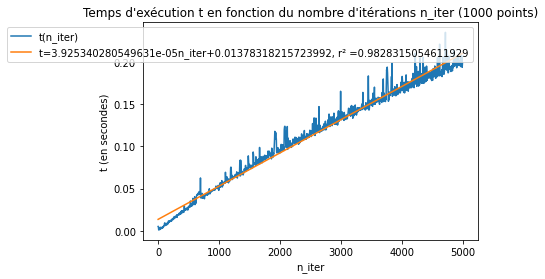

> 

## 2. Simulations et analyses

Dans cette partie, nous étudierons l’évolution de la répartition des habitants d’une ville. Nous analyserons ensuite les effets de la valeur des différents paramètres: au fait, ici, le seul paramètre qu'il est intéressent d'étudier est le seuil de tolérance $T$. En effet, la taille de la population n'influe que sur la vitesse du phénomène de déménagements. 

Donnons-nous alors quelques données numériques pour simuler notre modèle. On a précédemment évoqué que le modèle de Schelling reproduisait initialement la ségrégation sociale aux Etats-Unis. Prenons alors comme exemple une petite ville de ce pays : d'après l'article suivant [America is more small town than we think](https://www.newgeography.com/content/00242-america-more-small-town-we-think), le pays comporte de nombreuses petites villes avec en moyenne 20 000 habitants. On peut alors prendre pour modèle l'une d'elles. 

Supposons qu'un ménage contient $5$ habitants en moyenne : la ville comporte alors $20 000 \div 5 = 4 000$ ménages. On pourra alors prendre pour nos simulations $(n,p) = (50,80)$. 

En réalité, le paramètre de taille de la ville n'a pas un impact important: plus il est grand, plus nos algorithmes prendront de temps à afficher une ségrégation (lorsque la valeur des paramètres choisis le permet). Ainsi, les résultats que nous observerons ne concerneront pas uniquement les petites villes: ils pourront aussi s'appliquer aux villes de toute taille ayant la même répartition ethnique que celle qu'on crée dans notre simulation. 

### a) Visualisation d'une simulation pour l'utilisateur

Les deux fonctions suivantes vont nous permettre d'illustrer notre ville, et suivre son évolution au fur et à mesure des itérations des fonctions précédentes.


In [0]:
def trace_ville (ville,i) :  # i est le numéro de la figure
    
    #On initialise la figure et on règle les axes :
    fig = plt.figure(i)
    ax = plt.axes(xlim=(-0.5,np.shape(ville)[1]-0.5), ylim=(-0.5,np.shape(ville)[0]-0.5)) 
    #Crée les axes des abscisses et ordonnées avec des longueurs adaptées à la taille de ma ville.
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect("equal")
    
    #On place ensuite les individus :
    cmap = ListedColormap([(1,1,1),(1,0.8,0.8),(0,0,0)]) 
    #Couleurs choisies, indiquées selon leur code RVB
    img = plt.imshow(ville, cmap=cmap) 
    plt.draw()

> La fonction `trace_ville` trace ma ville et sa frontière extérieure selon le code couleur suivant: blanc si l'emplacement est vide, noir si on a un ménage noir, et rose si on a un ménage blanc.

In [0]:
def simulation (ville,T,i_max,nb_graph) :  
#i_max désigne le nombre total d'itérations, et nb_graph le nombre de graphiques à afficher.
#Ces paramètres sont à choisir de sorte que i_max divisible par (nb_graph-1).
#T désigne le seuil de tolérence commun à tous les ménages de la ville.
    trace_ville(ville,0)
    sub_i = i_max // (nb_graph-1) 
    #sub_i correspond au nombre d'itérations qu'on effectuera entre chaque graphique.
    for i in range(1,nb_graph) :
        for j in range(sub_i) :
            iteration(ville,T)
    #Pour tout graphique i, on effectue sub_i itérations.
        trace_ville(ville,i)
    #Représente graphiquement le dernier état de la ville

> La fonction `simulation` illustre les dynamiques au sein de la ville, en illustrant la ville au fur et à mesure des déménagements.



### b) Influence de la valeur du paramètre $T$


On se donne 3 petites villes Américaines, dont les habitants possèdent des taux de tolérance différents: faible, modéré et élevé. On va comparer la répartition des ménages dans ces villes après un grand nombre d'itérations. 

In [0]:
ville1=ville(50,80)
ville2=ville(50,80)
ville3=ville(50,80)

---

Effectuons différentes simulations de notre modèle, avec des valeurs différentes du paramètre $T$:

-	Si T est faible (par exemple, $T = \frac {1}{8}$), le système est comme gelé en dehors d’un équilibre. Il n'y a pas d’évolution notable, et on observe une frustration de la population. En effet, la population étant exigente, elle est insatisfaite de son lieu de vie, mais trouve très peu de sites satisfaisants où déménager. Ainsi, très peu de déménagements ont lieu. Néanmoins, quelques petits blocs de ménages de même classe parviennent à se former, bien que de taille limitée.





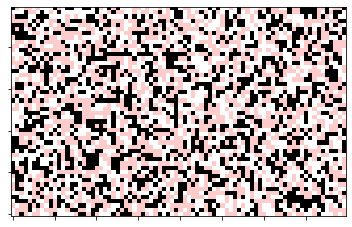

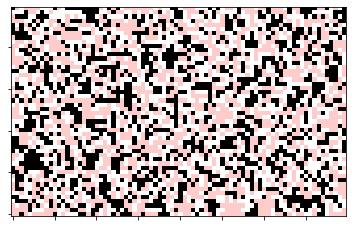

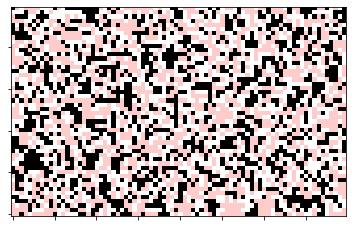

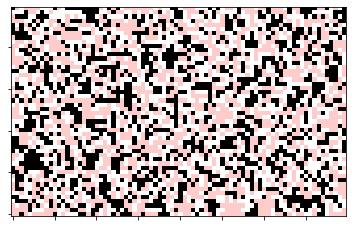

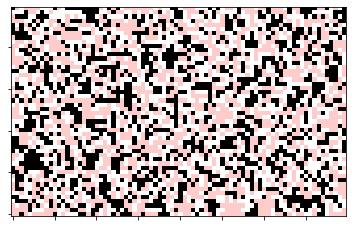

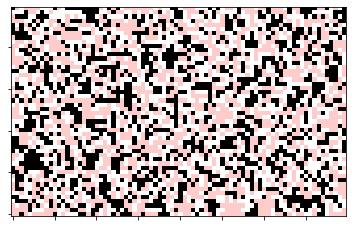

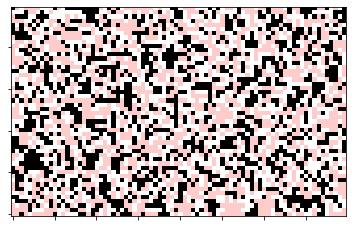

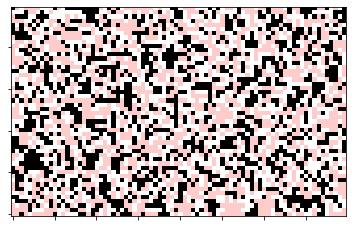

In [0]:
simulation(ville1,1/8,100000,8)

-	Pour un niveau T intermédiaire (par exemple, $T = \frac {1}{2}$), on assiste à une ségrégation sociale forte: on observe des blocs d'individus de même classe sociale. En effet, la population a un seuil de tolérance modéré: ainsi, lorsqu'un ménage est mécontent de son logement, sachant qu'il n'est pas trop strict, il trouve assez facilement un logement dont le voisinage lui convient, i.e. un voisinage où sa classe sera majoritaire. Des groupes de régions où une classe prédomine se forment alors.

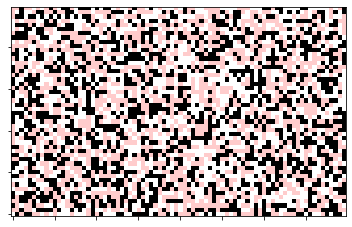

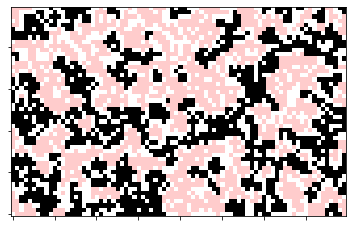

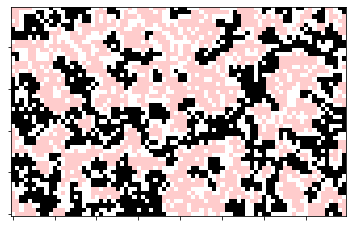

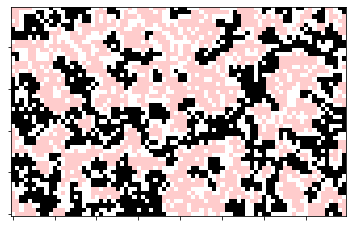

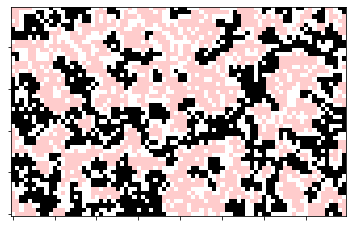

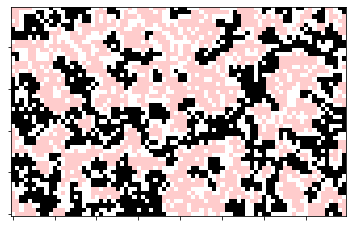

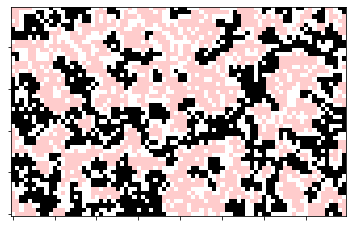

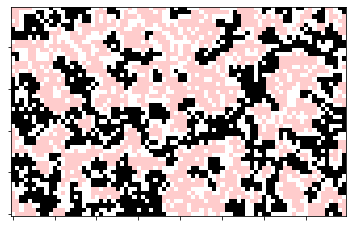

In [0]:
simulation(ville2,1/2,100000,8)


-	Pour un niveau T fort (par exemple, $T = \frac {7}{8}$), le système est hétérogène et les classes se mélangent relativement: la population initialement mélangée étant ouverte, lorsque l'on choisit un ménage, il y a de grandes chances que son voisinage le laisse indifférent, qu'il soit varié ou non. Ainsi, très peu de déménagements se font. Néanmoins, des petits blocs de ménages de même classe se forment sur le long-terme.


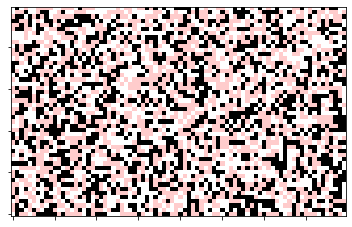

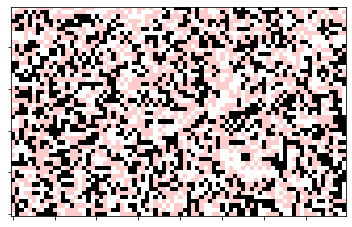

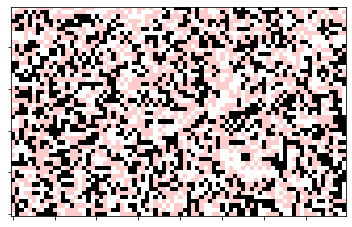

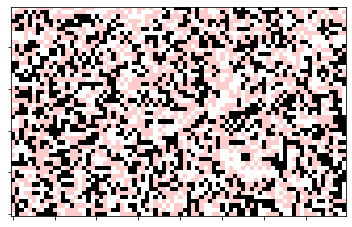

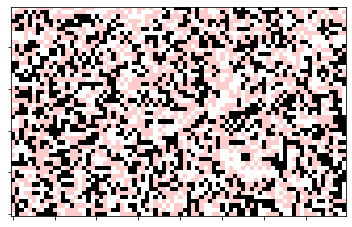

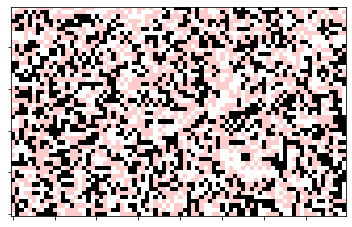

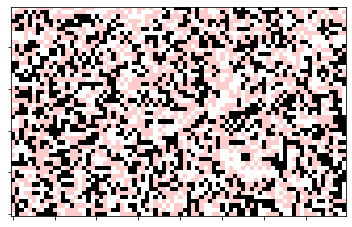

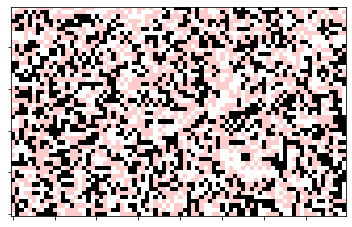

In [0]:
simulation(ville3,7/8,100000,8)

### c) Influence de l'introduction d'un seuil de tolérance spécifique à chaque classe

Les relations entre classes ne sont pas forcément réciproques: il se peut que l'une ne tolère pas autrui de façon plus marquée que l'autre. 

En effet, les discriminations allant à l'encontre des noirs citées plus tôt ont poussé les Afro-Américains à vivre entre eux: on parle parfois de communautarisme.

Dès lors, il serait intéressant d'introduire dans notre modèle des seuils de tolérance propres à chaque classe de notre population:

$\forall(i,j)\in[\![ 1,n ]\times[ 1,p ]\!]$,
$$\ T_{i,j} = \left\{
    \begin{array}{ll}
        T_{b} & \mbox{si  le ménage $(i,j)$ est blanc} \\
        T_{n} & \mbox{si  le ménage $(i,j)$ est noir}
    \end{array}
\right.$$

où $T_{b},T_{n} \in [0,1],  T_{b} \neq T_{n} $.

Modifions alors la fonction d'itération introduite précédemment, de sorte à prendre en compte les différents seuils de tolérance (on ne commentera en détail que les parties qui ont changé par rapport à la fonction précédente):


In [0]:
def nouvelle_iteration(ville,Tb,Tn):
    n=np.shape(ville)[0]
    p=np.shape(ville)[1]
    i , j = randint(0,n-1) , randint(0,p-1)
    #(i,j) caractérise la position d'un ménage choisi au hasard dans l'intérieur de la ville.
    k , l = randint(0,n-1) , randint(0,p-1)

    #Mêmes variables que tout à l'heure, qui servent à alléger notre programme en complexité...
    nombre_operations1 = 0
    nombre_operations2 = 0

    #Recherche d'un ménage (i.e. emplacement habité)
    while ville[i,j] == 0 and nombre_operations1 < 50 :
        i , j = randint(0,n-1) , randint(0,p-1)
        nombre_operations1 = nombre_operations1 + 1

    #On initie une boucle while, qui identifie la classe du ménage (i,j) choisi. Ensuite, il 
    #effectue les mêmes opérations que la fonction 'itération' originelle, en prenant cette fois
    #en compte le seuil de tolérance associé la classe du ménage (i,j). 
    if ville[i,j] == 1:
        if frequence(ville,i,j)>Tb: 
            while (ville[k,l] != 0 or habitatconforme(ville,k,l,ville[i,j]) > Tb) and nombre_operations1 < 50 :
                k , l = randint(0,n-1) , randint(0,p-1)
                nombre_operations1 = nombre_operations1 + 1
            if habitatconforme(ville,k,l,ville[i,j]) <= Tb:
                swap(ville,i,j,k,l)
    elif ville[i,j] == 2:
        if frequence(ville,i,j)>Tn: 
            while (ville[k,l] != 0 or habitatconforme(ville,k,l,ville[i,j]) > Tn) and nombre_operations2 < 50 :
                k , l = randint(0,n-1) , randint(0,p-1)
                nombre_operations2 = nombre_operations2 + 1
            if habitatconforme(ville,k,l,ville[i,j]) <= Tn:
                swap(ville,i,j,k,l)

> La fonction `nouvelle_iteration` reprend dans les grandes lignes la fonction d'itération précédente. Cependent, elle introduit des nouveautés:
- Elle prend désormais deux seuils de tolérance différents en paramètre, l'un pour la population blanche, l'un pour la population noire.
- Elle utilise une nouvelle boucle if, qui va identifier la classe de l'individu choisi, et va le faire déménager ou non selon la tolérance associée à sa classe. 

Le changement de fonction d'itération doit être pris en compte dans la fonction qui représente les dynamiques de déménagement dans la ville. C'est pourquoi on crée la fonction `nouvelle_simulation` qui correspond à une modification de la fonction `simulation` qui considère `nouvelle_iteration`:

In [0]:
def nouvelle_simulation (ville,Tb,Tn,i_max,nb_graph) :  
    trace_ville(ville,0)
    sub_i = i_max // (nb_graph-1)   
    for i in range(1,nb_graph) :
        for j in range(sub_i) :
            nouvelle_iteration(ville,Tb,Tn) #Seul changement ici
        trace_ville(ville,i)

Cette fois, on crée toujours une ville de taille $(n,p)=(50,80)$. Cependant, on va se fixer deux seuils de tolérances différents pour chaque partie de la population, qui traduisent l'indifférence de la population blanche et le choix de vivre ensemble des populations Afro-Américaines : on choisit $T_{b} = \frac{7}{8} $ et $T_{n} = \frac{1}{2}$ afin qu'un ménage blanc déménage seulement s'il est en flagrante minorité dans son entourage, et qu'un ménage noir soit satisfait si et seulement si son voisinage est majoritairement noir. 

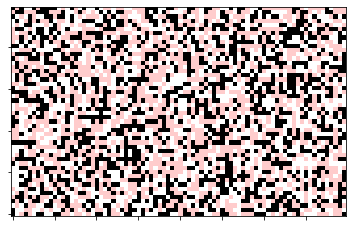

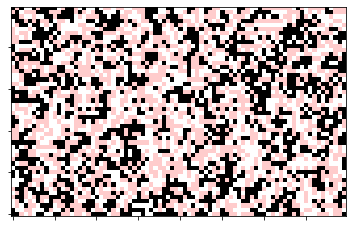

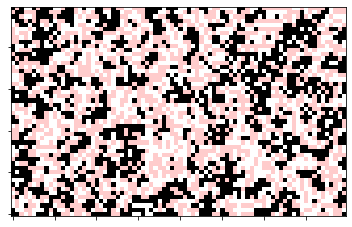

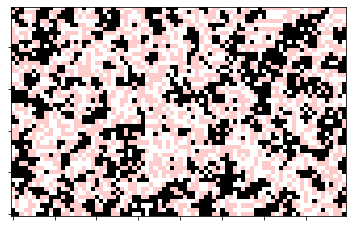

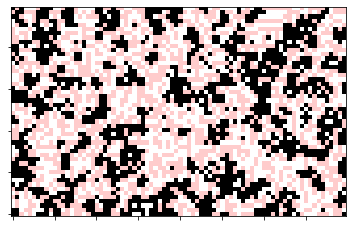

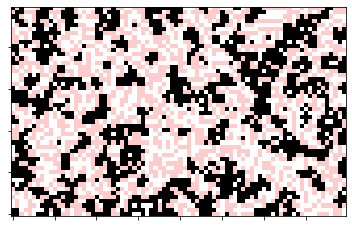

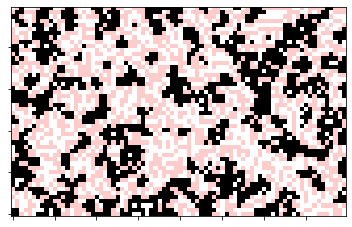

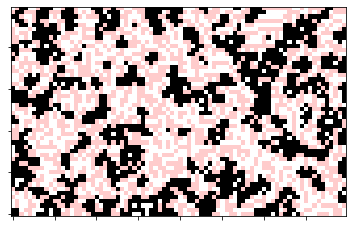

In [0]:
ville4=ville(50,80)
nouvelle_simulation(ville4,7/8,1/2,10000,8)

On observe la formation de blocs de ménages Afro-Américains dû au déménagement massif des familles noires insatisfaites de leur voisinage qui les rassemble alors. La population blanche, globalement indifférente, ne déménage que très peu. Ainsi, on peut identifier la présence de ménages blancs dans des régions à dominante noire. 

### d) Influence de l'introduction de nouvelles classes

Les Etats-Unis se sont grandement enrichis en terme de diversité ethnique au cours du dernier siècle. Deux nouveaux groupes se distinguent en particulier: 
- Les Asiatiques: les guerres indirectes de la Guerre Froide dans des pays asiatiques (Corée, Vietnam...) et guerres secrètes en Asie ont causé une vague de migration vers les Etats-Unis. Ils représentent aujourd'hui 10% de la population Etats-Unienne.
- Les Latino-Américains: dans les années 1940 à 1960, de nombreux Latino-Américains partent vivre au Etats-Unis, dû à une demande intense de travail bon marché, on les appelle les "Braceros". Dès les années 1960, face à l'instabilité des régimes d'Amérique Centrale et d'Amérique du Sud, des mouvements de réfugiés vers les Etats-Unis se font. Ils représentent aujourd'hui 25% de la population du pays. 

On va donc rajouter ces deux classes à notre modèle pour le rendre plus réaliste: un $3$ dans notre matrice-ville représentera un ménage Asiatique, et un $4$ représentera un Latino-Américain.

Puisque nos fonctions `fréquence` et `habitat_conforme` ont été créées de sorte à calculer le nombre de voisins étrangers d'un ménage, quelle que soit leur classe, nous n'avons pas grand chose à modifier. 

Les seules choses que nous allons changer sont:
- La fonction qui crée notre ville, afin qu'elle génère des ménages faisant partie des deux nouvelles classes.
- La fonction qui représente graphiquement notre ville, afin qu'elle représente les ménages Asiatiques en vert, et les ménages Latino-Américains en violet. 
- La fonction de simulation sur le long-terme, qui prend en compte la nouvelle fonction qui représente graphiquement notre ville. 

In [0]:
def ville_multiethnique (n,p): 
    ville = np.random.randint(0,5,(n,p))
    #La ville peut désormais contenir des 3 et des 4 en plus des 0, 1 et 2.
    return(ville)

def trace_ville_multiethnique (ville,i) :  # i est le numéro de la figure
    
    #On initialise la figure et on règle les axes :
    fig = plt.figure(i)
    ax = plt.axes(xlim=(-0.5,np.shape(ville)[1]-0.5), ylim=(-0.5,np.shape(ville)[0]-0.5)) 
    #Crée les axes des abscisses et ordonnées avec des longueurs adaptées à la taille de ma ville
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect("equal")
    
    #On place ensuite les individus :
    cmap = ListedColormap([(1,1,1),(1,0.8,0.8),(0,0,0),(0.8,1,0.8),(0.8,0.8,1)]) 
    #Couleurs choisies, indiquées selon leur code RVB
    img = plt.imshow(ville, cmap=cmap) 
    plt.draw()

def simulation_multiethnique (ville,T,i_max,nb_graph) :  
#A choisir de sorte que i_max divisible par (nb_graph-1)
    trace_ville_multiethnique(ville,0)
    sub_i = i_max // (nb_graph-1)   
    # Nombre d'itérations entre chaque graphique
    for i in range(1,nb_graph) :
        for j in range(sub_i) :
            iteration(ville,T)
        trace_ville_multiethnique(ville,i)
  

Muni de ces nouvelles fonction, on peut effectuer une simulation avec une ville de taille $(50,80)$ habitée par les 4 classes, avec un seuil de tolérance $T = \frac{1}{2}$, afin d'avoir une ségrégation marquée comme on a pu le voir précédemment:

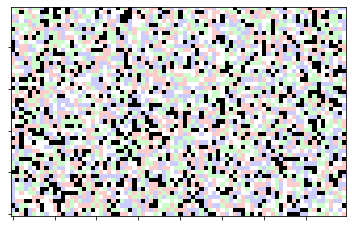

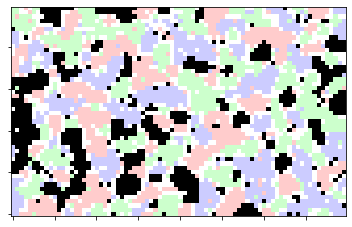

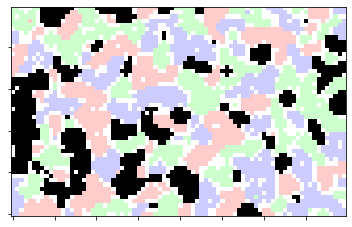

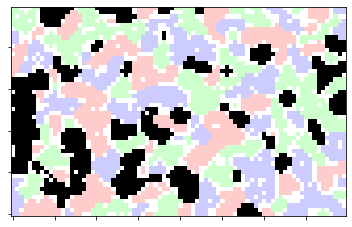

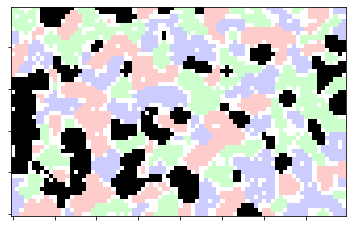

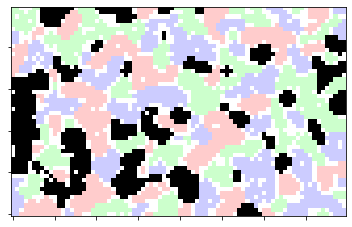

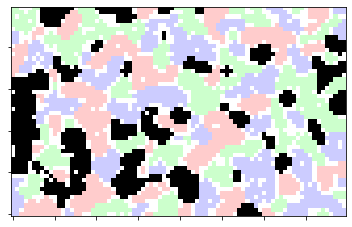

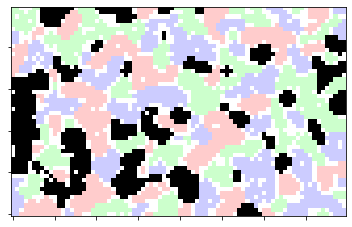

In [0]:
ville5 = ville_multiethnique(50,80)
simulation_multiethnique(ville5,1/2,100000,8)

On peut alors observer une ségrégation marquée, avec la formation de blocs de ménages de chaque classe. 

### e) Rendre la ville plus réaliste, en choisissant une distribution des classes pas forcément équitable

Le modèle de Schelling de base considère que les classes sont réparties de façon équitable au sein de la ville, chose très peu probable dans la vraie vie. C'est pourquoi il serait intéressant de proposer une nouvelle fonction qui nous crée une ville et qui nous permet de choisir dans quelle proportion chaque classe sera représentée. La fonction `ville_realiste1` permet cela, dans le cas où la population est constituée de deux classes, tandis que `ville_realiste2` le fait pour une ville avec quatre classes: 

In [0]:
def ville_realiste1 (n,p,proportion_logements_vides,proportion_blancs,proportion_noirs): 
    #n et p caractérisent toujours la taille de notre ville. 
    #Les proportions d'espaces vides et d'individus de chaque classe sont à choisir de sorte que 
    #leur somme vaille 1.

    ma_ville = np.zeros((n,p))
    #Je crée une matrice de taille n*p : pour le moment, son contenu n'a pas d'importance.

    #On initie une double-boucle "for" pour prendre un par un chaque coefficient de la matrice. 
    for i in range(0,n):
        for j in range(0,p):  
            ma_ville[i,j] = np.argwhere(multinomial(1,[proportion_logements_vides,proportion_blancs,proportion_noirs])==1)
    #On simule une loi multinomiale de paramètre n=1 qui prendra une valeur entre 0 et 4, selon les
    #proportions rentrées. La fonction multinomial affiche un vecteur de taille 5, où le (i+1)-ème
    #coefficient affiche le nombre de fois la valeur i a été prise. Comme n=1, seule une des 5 
    #valeurs sera prise: ce vecteur contiendra donc quatre coefficients "0", et un seul "1" dont
    #l'indice de position indique la valeur qui a été prise. On utilise alors np.argwhere pour 
    #déduire cette dernière, et attribuer au ménage (i,j) sa classe. 

    return(ma_ville)

'''
La fonction `ville_realiste2` reprend essentiellement la première, en prenant désormais en compte  
2 nouvelles classes supplémentaire: on a donc deux nouveaux paramètres d'entrée, qui correspondent 
aux proportions de ménages appartenant à ces eux classes dans la ville. 
'''

def ville_realiste2 (n,p,proportion_logements_vides,proportion_blancs,proportion_noirs,proportion_asiats,proportion_latinos): 
    #Les proportions sont toujours à choisir de sorte que leur somme vaille 1.
    ma_ville = np.zeros((n,p))

    for i in range(0,n):
        for j in range(0,p):
            ma_ville[i,j] = np.argwhere(multinomial(1,[proportion_logements_vides,proportion_blancs,proportion_noirs,proportion_asiats,proportion_latinos])==1)
  
    return(ma_ville)
    

> Résumé de ces deux fonctions: une fois que j'ai créé une matrice de taille $n*p$, je balaie chaque coefficient de ma matrice. Pour chacun, je réalise une simulation d'une loi multinomiale avec n=1 et dont le vecteur-paramètre de probabilités correspond aux proportions données comme argument de la fonction: il prendra une valeur dans $[\![0,4]\!] $ selon ces proportions.
           

Effectuons maintenant une simulation en utilisant l'une de ces deux nouvelles fonctions, en s'inspirant de la ville de New-York, connue pour sa grande diversité ethnique. Selon Statistical Atlas, sa population est répartie ainsi: 
- 32% de caucasiens
- 29% de latino-américains.
- 24% de noirs. 
- 14% d'asiatiques.
- le reste (3%) de minorités.

On va omettre les minorités dans notre simulation. Si l'on souhaite que notre ville soit constituée de 10% d'espaces vides, il faut que les 90% d'espaces habités soit répartis selon la distribution citée précédemment. Pour avoir une répartition proche de la ville de celle de New-York on peut prendre, afin d'arriver à un total de 100% : 
- 10% d'espaces vides.
- 30% de caucasiens.
- 25% de latino-américains.
- 25% de noirs.
- 10% d'asiatiques.


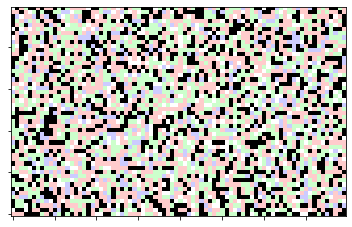

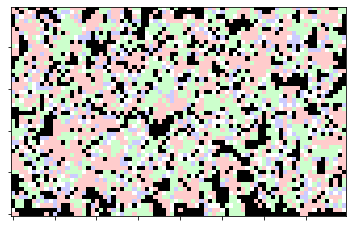

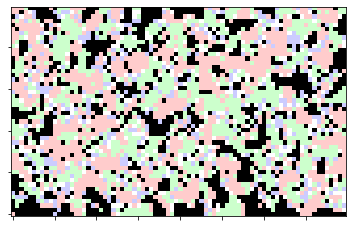

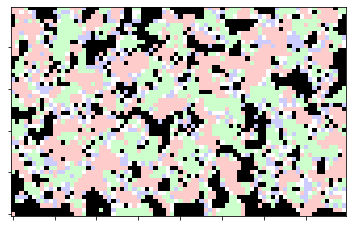

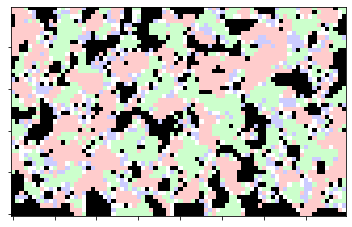

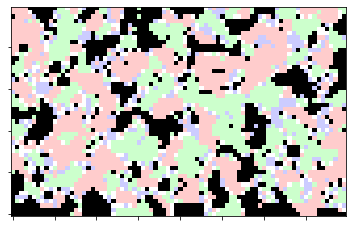

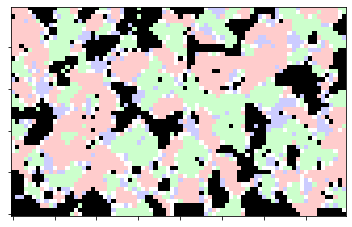

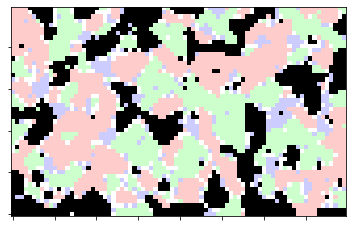

In [0]:
ville6=ville_realiste2(50,80,0.1,0.3,0.25,0.25,0.1)
simulation_multiethnique(ville6,1/2,100000,8)

## Evaluation du modèle

### a) Un modèle qui se rapproche parfois de la réalité

Le modèle de Schelling originel n'implique que deux classes. Il utilise une vision simpliste semblable à celle de Gertrude Himmelfarb dans son ouvrage *One Nation, Two Cultures*, où elle affirme que la population Américaine peut être divisée en deux classes opposées, dont les intérêts se contredisent: les dominants et les oppressés. Cette division peut être ethnique, sexuelle ou politique...
Dès lors, le modèle de Schelling peut se révéler pertinent pour les villes où deux ethnies sont majoritaires. 

On peut alors trouver quelques villes aux Etats-Unis pouvant être simulées par le modèle de Schelling originel: celle de Philadelphie par exemple, en Pennsylvanie, où, selon les chiffres de 2018 du Bureau du recensement des Etats-Unis, 42.3% de la population est noire, 41.2% est blanche, le reste étant constitué de minorités. 

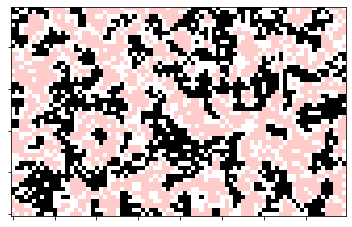

![Texte alternatif…](http://img.over-blog-kiwi.com/0/67/27/63/20170321/ob_2f5b4c_figure-3.gif)

Sur cette carte, on peut observer plusieurs blocs de population de même classe éparpillés dans la ville, semblables à ceux que l'on a obtenu dans notre simulation initiale avec $T = \frac{1}{2}$. Dès lors, il est légitime d'affirmer que le modèle de Schelling parvient à simuler la ségrégation sociale dans certaines villes. 



### b) Un modèle qui, toutefois, représente mal les préférences de déménagement des ménages

Notre simulation n'est pas satisfaisante pour toutes les villes avec deux classes majoritaires. Prenons le cas de Washington D.C., capitale des Etats-Unis: selon le Bureau du Recensement des Etats-Unis en 2017, sa population est constituée de 47.1% de noirs, et 45.1% de blancs.

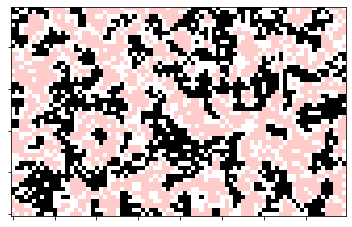

![Texte alternatif…](https://ggwash.org/images/posts/_resized/animatedbshareRESIZE.gif)

On observe bien la formation de clusters au sein de la population de cette ville, comme dans notre simulation avec $T = \frac{1}{2}$. Cependant, ils sont beaucoup moins nombreux et bien plus gros que dans notre simulation. 

Cela est dû au fait que dans le modèle originel de Schelling, à chaque étape, le ménage insatisfait choisit au hasard les potentiels espaces vides vers lesquels il déménagera. Il ne se contente que de rejoindre un habitat avec un voisinage qui lui plait : ainsi, sur le long-terme on observe la formation de plusieurs petits quartiers dominés par une classe, alors que dans la réalité, un noyau dur autour duquel les habitants insatisfaits de même classe se placent se constitue. 
Pour résoudre cela, il faudrait plutôt que considérer les 8 voisins directs d'un ménage, considérer un plus grand voisinage, et raisonner en termes de quartier comme dans le modèle qu'on étudiera dans notre deuxième partie. 

### c) Un modèle à adapter aux dynamiques ethniques des villes

Puisqu'il n'implique que deux classes, on peut qualifier le modèle de Schelling originel de réducteur : il ne tient pas compte de la part importante que d'autres classes peuvent prendre dans certaines villes, les Asiatiques et les Hispaniques cités précédemment en particulier.

Rappelons la répartition ethnique de New-York:
- 32% de caucasiens
- 27% de latino-américains.
- 24% de noirs. 
- 14% d'asiatiques.
- le reste (2%) de minorités.

Dès lors, simuler la ségrégation sociale à New-York avec notre première simulation, codée selon le modèle originel de Schelling à deux classes serait absurde: cela reviendrait à regrouper plusieurs de ces ethnies sous la même classe, ce qui serait peu fidèle à la réalité. En effet, Pauline Peretz, dans *L'Amérique post-raciale?* déplore l'échec du multiculturalisme: bien que les Etats-Unis soient un pays très riche en terme de diversité ethnique, les différents groupes vivant là-bas se mélangent très peu et sont l'objet de tensions. Elle remet alors en cause le concept d'Amérique "post-raciale" d'Obama, selon lequel "la race n'a plus d'importance" et n'engendre plus de distinction.

C'est pourquoi on a décidé de pousser ce modèle plus loin, en introduisant deux nouvelles classes représentant asiatiques et latino-américains dans la sous-partie d) de la partie "Simulations et analyses".

De plus, le modèle de Schelling originel considère que la proportion de chaque classe dans la ville est la même, ce qui n'est pas toujours fidèle à la réalité. Par exemple, à New-York, la population asiatique est moins conséquente que les autres grands groupes ethniques. 

Pour l'améliorer, dans la sous-partie e) de "Simulations et analyses", on a codé des fonctions créant notre ville avec une loi multinomiale, dont les paramètres sont à adapter selon la vraie répartition ethnique de la ville qu'on souhaite simuler.


 

Après avoir corrigé ces deux défauts, en prenant un seuil de tolérance $T = \frac{1}{2}$ pour avoir une ségrégation marquée, on obtient une logique semblable à la répartition ethnique de New-York, représentée par cette carte réalisée par le groupe de recherche démographique de l'Université de Virginie en 2013 : 

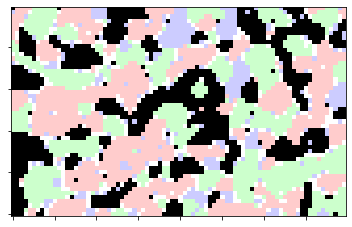

![Texte alternatif…](https://dabrownstein.files.wordpress.com/2013/07/nyc-racial-map-from-20005-9-census.jpg)

# II. Ségrégation spatiale - le modèle de Grauwin et Jensen

En 2009, Grauwin et Jensen ont repris et adapté le modèle de ségrégation de Schelling pour étudier la ségrégation spatiale, et les répercussions d’actions à l’échelle microscopique sur l’échelle macroscopique. 

Cette fois, ils ne considèrent qu’un seul type d’individu dans une ville divisée en quartiers, et étudient leur répartition au fil du temps. Les agents se voient alors proposer des déménagements aléatoirement, et cherchent à maximiser leur propre utilité, liée à la densité de population de leur quartier. Grauwin et Jensen introduisent par la suite quelques agents altruistes, qui cherchent à optimiser l’équilibre agrégé, pour étudier leur impact sur l'évolution de la ville.


> Les programmes présentés dans cette section pourront être trouvés dans le dossier `Grauwin`.

## 1.   Implémentation du modèle

### a) Définition des paramètres

Dans le modèle de Grauwin et Jensen, on considère une ville représentée par une grille carrée, divisée en $Q=q^2$ quartiers contenant chacun $H=h^2$ emplacements. La taille de la ville est donc $l=h*q$. 

On y place initialement, et de manière aléatoire, $N$ agents (ou ménages), de sorte que la densité de la ville soit $ρ_0=\frac{1}{2}$. On a ainsi $N=\frac{HQ}{2}$ habitants. Parmi eux, on note $0≤α≤1$ la fraction des individus qui sont dits "altruistes", c'est-à-dire qui vont agir pour le bien commun et non dans leur propre intérêt.

De plus, on caractérise chaque individu par une fonction d'utilité $u$ dépendant de la densité $ρ$ du quartier dans lequel il vit, et par un paramètre de "bruit" $\frac{1}{T}$. Ce dernier représente l'ancrage des individus dans leur quartier, des contraintes au déménagement qui n'entrent pas ici en compte dans le calcul de l'utilité (par exemple la proximité de leurs amis et de leur travail). Nous reviendrons sur son effet plus tard.

Le modèle de Grauwin et Jensen considère les individus pleinement satisfaits lorsqu'ils habitent dans un quartier de densité $ρ=\frac{1}{2}$. Cette intuition est due au fait que vivre dans un quartier saturé est contraignant (embouteillages, …), et que vivre dans un quartier trop vide l'est aussi (pas assez de vie, d'infrastructures, ...). On choisit donc, pour simplifier, une fonction d'utilité individuelle linéaire par morceaux, telle que l'utilité soit maximale (égale à 1) si $ρ = \frac{1}{2}$ : 

$$\ u(ρ) = \left\{
    \begin{array}{ll}
        2ρ & \mbox{si } ρ ≤ \frac{1}{2} \\
        2(m-1)ρ+(2-m) & \mbox{sinon}
    \end{array}
\right.$$

où $m$ est un paramètre d'asymétrie, qui attribue l'utilité $0≤m≤1$ à la densité $ρ = 1$, partant du principe qu'un quartier surpeuplé sera toujours préféré à un quartier très peu peuplé. 

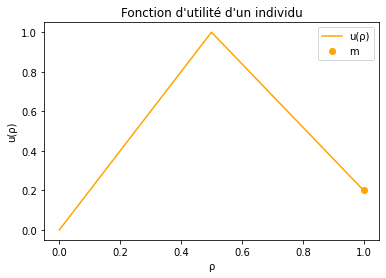

In [0]:
plt.plot([0,0.5,1],[0,1,0.2],label='u(ρ)', c='orange')
plt.plot(1,0.2,'o', label='m', c='orange')
plt.xlabel("ρ")
plt.ylabel("u(ρ)")
plt.title("Fonction d'utilité d'un individu")
plt.legend()
plt.show()

Afin d'implémenter le modèle, on crée deux classes : l'une contenant les paramètres des simulations, et l'autres regroupant les caractéristiques d'une ville lors des simulations. Cette dernière représente une ville par une grille remplie de $0$ (emplacement vide), de $1$ (emplacement occupé par un individu égoïste) et de $2$ (emplacement occupé par un individu altruiste) représentant l'état de la ville, et d'une grille contenant la densité de chaque quartier, pour pouvoir y accéder rapidement. 

In [0]:
class Paramètres :
    """ Classe regroupant tous les paramètres d'une simulation """
    
    def __init__ (self,q,h,T,m,alpha = 0) :
        self.q = q  # définit le nombre de quartier Q = q²
        self.h = h  # définit le nombre d'emplacements par quartiers H = h²
        self.l = h*q  # taille de la ville 
        
        self.N = ((h*q)**2)//2  # Nombre d'agents initialement 
        self.T = T # Contrainte caractérisant l'ancrage des individus dans leur quartier
        self.alpha = alpha  # Coefficient intégrant l'altruisme
        
        self.u = lambda x : 2*x if x <= 1/2 else (2*(m-1)*x+2-m) # Fonction d'utilité des agents
        

class Ville :
    """Classe regroupant toutes les caractéristiques de la ville d'une simulation :
        - la ville, sous la forme d'une grille de taille l * l, contenant : 0 si l'emplacement est vide, 1 s'il est occupé par un habitant égoiste, 2 s'il est occupé par un habitant altruiste
        - les densités de chaque quartier, sous la forme d'une grille q*q
    """
    
    def __init__ (self,ville,densites) :
        self.ville = ville
        self.densites = densites

On peut également définir la fonction d'utilité agrégée de la ville, définie de la manière suivante : 

$$ U(x) = \sum_{i=1}^{q} \sum_{j=1}^{q} n_{i,j} u(ρ_{i,j}) = H \sum_{i=1}^{q} \sum_{j=1}^{q} ρ_{i,j} u(ρ_{i,j}) $$

pour une configuration $x=(ρ_{i,j})_{0≤i≤q,0≤j≤q}=(\frac{n_{i,j}}{H})_{0≤i≤q,0≤j≤q}$ de la ville.

In [0]:
def U(ville,p) :
    s = 0
    for i in range(p.q) :
        for j in range(p.q) :
            rho = ville.densites[i,j]
            s+= rho * p.u(rho)
    H = (p.h)**2
    return s * H

> Les classes et l'utilité agrégée sont regroupés dans le programme `classes.py`.



### b) Initialisation et principe d'itération du modèle

Pour implémenter le modèle de Grauwin et Jensen, on commence par une première fonction `init_ville`, qui permet, à partir de paramètres passés en argument, de créer une ville. 

On commence par créer une matrice vide de taille $l*l$, puis on la remplit progressivement et aléatoirement par le bon nombre d'individus égoïstes et altruistes. On crée ensuite la matrice des densités, de taille $q*q$, et que l'on remplit quartier par quartier.

In [0]:
def init_ville (p) :
    ville = np.zeros((p.l,p.l),dtype=int)
    n_alpha = int(p.alpha * p.N)  #nombre d'habitants altruistes qui sont encore à placer
    n = p.N - n_alpha  #nombre d'habitants égoïstes qui sont encore à placer
    
    #On commence par placer les altruistes :
    while n_alpha > 0 :    #tant qu'il n'y a pas n_alpha habitants altruistes dans la ville, on continue 
        i , j = randint(0,p.l-1) , randint(0,p.l-1) 
        if ville[i,j] == 0 : 
            ville[i,j] = 2
            n_alpha -=1    
    #Ensuite, on place les autres habitants (égoistes) :
    while n > 0 : 
        i , j = randint(0,p.l-1) , randint(0,p.l-1)  
        if ville[i,j] == 0 :
            ville[i,j] = 1
            n-=1
            
    #On crée ensuite la matrice des densités par quartiers
    densites = np.zeros((p.q,p.q)) 
    H = (p.h)**2 #nombre d'emplacements par quartiers
    for i in range(p.q) :
        for j in range(p.q) : 
            d = np.sum(ville[i*p.h : (i+1)*p.h-1 , j*p.h : (j+1)*p.h-1]!=0) #compte le nombre d'habitants dans le quartier (i,j)
            densites[i,j] = d/H 
    
    return Ville(ville,densites)

Passons ensuite à une fonction actualise, qui réalise une itération du modèle, c'est-à-dire qui choisit aléatoirement un individu et un emplacement vide (dans un quartier différent), et propose à cet infividu de déménager.

Contrairement au modèle de Schelling, le déménagement dans ce modèle ne se fait pas systématiquement dès lors que le gain d'utilité lié au déménagement est positif. Ici, l'individu choisi a une certaine probabilité $p$ de déménager, définie par une loi de logit :
$$p=\frac{exp(\frac{u'}{T})}{exp(\frac{u'}{T})+exp(\frac{u}{T})}=\frac{1}{1+exp(-\frac{∆u}{T})}$$
Avec : 

*   $∆u=u'-u$ le gain d'utilité lié au déménagement (utilité de l'agent s'il déménage - utilité de l'agent sinon). Si l'individu est égoïste, on considère son utilité individuelle, et s'il est altruiste, on considère l'utilité agrégée.
*   $\frac{1}{T}$ est le paramètre de bruit. Ainsi, quand $T→∞$, le choix des individus est "irrationnel", c'est-à-dire qu'ils sont indifférents entre déménager ou non : $p→\frac{1}{2}$. Au contraire, si $T→0$, le choix est "rationnel", et les individus démégent uniquement si cela maximise leur utilité : $p→ \left\{
    \begin{array}{ll}
        0 & \mbox{si } ∆u < 0 \\
        \frac{1}{2} & \mbox{si } ∆u = 0  \\
        1 & \mbox{si } ∆u > 0
    \end{array}
\right.$.



Voici la fonction correspondante, qui modifie directement la ville pour gagner du temps et de l'espace en mémoire, et ne renvoie rien :

In [0]:
def actualise (ville,p) :
    h=p.h
    # On commence par choisir un individu et une emplacement vacant au hasard (dans un quartier différent)
    indiv = (-1,-1)
    emplacement = (-1,-1)
    while indiv == (-1,-1) :
        i , j = randint(0,p.l-1) , randint(0,p.l-1)
        if ville.ville[i,j] != 0 :
            indiv = (i,j)
    while emplacement == (-1,-1) :
        i , j = randint(0,p.l-1) , randint(0,p.l-1)
        if all([ville.ville[i,j]==0, (indiv[0]//h) != (i//h), (indiv[1]//h) != (j//h)]) :  #s'assure que l'emplacement est vide et dans un quartier différent. L'avantage de la fonction all est que l'exécution s'arrête dès qu'une condition n'est pas remplie (gain de temps)
            emplacement = (i,j)
                  
    # Ensuite, on calcule les nouvelles et anciennes densités avant (0) et après (1) déménagement, dans le quartier de départ (i) et celui d'arrivée (e), pour en déduire les différences d'utilité
    H = (p.h)**2
    u=p.u
    
    rho_i0 = ville.densites[(indiv[0]//h),(indiv[1]//h)]
    rho_i1 = rho_i0 - 1/H
    rho_e0 = ville.densites[(emplacement[0]//h),(emplacement[1]//h)]
    rho_e1 = rho_e0 + 1/H
    
    if ville.ville[indiv[0],indiv[1]] == 1 :  #individu égoïste 
        delta_u = u(rho_e1) - u(rho_i0)  #différence d'utilité liée au déménagement
    else :  #individu altruiste
        delta_u = rho_i1*u(rho_i1) + rho_e1*u(rho_e1) - rho_i0*u(rho_i0) - rho_e0*u(rho_e0) #différence d'utilité liée au déménagement
    
    #On propose ensuite à l'individu de déménager selon la probabilité p calculée à partir de la loi de logit
    p = 1 / (1 + exp( - (delta_u) / p.T))
    if binomial(1,p) :  #renvoie 1 (déménagement) avec la probabilité p, et 0 (non déménagement) sinon
        ville.ville[indiv[0],indiv[1]], ville.ville[emplacement[0],emplacement[1]] = ville.ville[emplacement[0],emplacement[1]], ville.ville[indiv[0],indiv[1]]
        ville.densites[(indiv[0]//h),(indiv[1]//h)] -= 1/H
        ville.densites[(emplacement[0]//h),(emplacement[1]//h)] += 1/H

Enfin, pour implémenter le modèle de Grauwin et Jensen, on crée la fonction `grauwin` suivante, qui prend en argument les paramètres de la simulation et le nombre d'itérations à effectuer, et renvoie la ville obtenue à l'état finale : 

In [0]:
# Ainsi, le programme permettant de réaliser une simulation peut s'écrire simplement de la manière suivante : 

def grauwin (p, n_iter) :  #n_iter est le nombre d'itérations
    ville = init_ville (p)
    for i in range(n_iter) :
        actualise(ville,p)
    return ville

> Les fonctions de cette section sont regroupés dans le programme `grauwin.py`.

### c) Tests unitaires 

Afin de vérifier le bon fonctionnement des fonctions réalisées précédemment, nous avons choisi de créer deux tests unitaires :

*   Le premier, appelé `test_init_ville`, concerne la fonction `init_ville` : on y crée une petite ville de taille $6*6$, que l'on parcourt ensuite pour vérifier qu'elle contient le bon nombre d'individus altruistes et égoistes.
*   Le second, appelé `test_actualise`, concerne la fonction `actualise` : on y crée ici aussi une petite ville de taille $6*6$ et initialise un indicateur de la véracité du test à `1` (`True`), modifé au fur et à mesure. On s'assure dans un premier temps que la ville a été modifiée. Si non, alors on recrée une ville (l'objectif du test étant de vérifier le bon fonctionnement du déménagement). Ensuite, on s'assure que seules deux cases de la ville ont été modifiées, et que la matrice des densités représente bien l'état final de la ville. 



In [0]:
class Test(unittest.TestCase) :
    
    #Test de la fonction init_ville : 
    #On vérifie que la ville créée par init_ville pour 4 quartiers de 9 emplacements, contient bien 18 individus
    def test_init_ville(self):
        p=Paramètres(2,3,1,0.5,0.2)  
        ville = init_ville(p)
        n_al = 0  #nombre de personnes altruistes : normalement 3
        n_eg = 0  #nombre de personnes égoïstes : normalement 15
        for i in range(p.l) :
            for j in range(p.l) :
                if ville.ville[i,j] == 1 :
                    n_eg+=1
                elif ville.ville[i,j] == 2 :
                    n_al+=1
        self.assertEqual([n_eg,n_al],[15,3])
        
    #Test de la fonction actualise :
    #On s'assure qu'elle ne modifie que deux cases de la ville, que le nombre d'individus égoistes et altruistes est toujours correcte, et que les densités par quartiers sont correctes. 
    # On prend l'exemple d'une ville de 4 quartiers de 9 emplacements
    def test_actualise(self):
        p=Paramètres(4,5,100,0.2,0.1)  #Une grande valeur de T permet d'accélérer les déménagements
        ville = init_ville(p) 
        copie_ville = np.copy(ville.ville)  #list permet de faire une copie indépendante 
        copie_densites = np.copy(ville.densites)
        ville2 = Ville(copie_ville,copie_densites)
        
        test = True
        while test :  #on réactualise la ville jusqu'à ce qu'un déménagement ait lieu
            actualise(ville2,p)
            for i in range(p.l) :
                for j in range(p.l) :
                    if ville.ville[i,j] != ville2.ville[i,j] :
                        test = False
            #A ce stade, test vaut 1 si la ville est inchangée, et 0 sinon
        
        # Vérification de la grille de la ville :
        n_al = 0  #nombre de personnes altruistes : normalement 3
        n_eg = 0  #nombre de personnes égoïstes : normalement 15
        n_change = 0 #nombre de changements entre ville et ville2
        for i in range(20) :
            for j in range(20) :
                if ville2.ville[i,j] == 1 :
                    n_eg+=1
                elif ville2.ville[i,j] == 2 :
                    n_al+=1  
                if ville.ville[i,j] != ville2.ville[i,j] :
                    n_change += 1
        test = (n_eg == 180) and (n_al == 20) and (n_change == 2) #vérifie qu'il y a bien le bon nombre d'individus altruistes et égoistes, et que seules deux cases de la ville ont été modifiées

        #Vérification de la matrice des densités :
        for i in range(4) :
            for j in range(4) :
                d = np.sum(ville2.ville[i*5 : (i+1)*5-1 , j*5 : (j+1)*5-1]!=0)
                test = (test and ( (d/25) == ville2.densites[i,j] ))   #vérifie que les densités sont bonnes         
        self.assertEqual(test,True)   

> Les tests unitaires réalisés ici peuvent être trouvés dans le programme `tests.py`, et sont automatiquement réalisés à l'exécution de ce programme dans une console python. 

### d) Terminaison et complexité

*   **Coût en mémoire :**

Intéressons nous tout d'abord à la place en mémoire utilisée par l'implémentation du modèle de Grauwin et Jensen que nous avons réalisée. 

Une simulation avec une ville de taille $l=hq$ nécessite initialement la création d’une matrice de taille $l*l$, pour représenter la ville, et d’une matrice de taille $q*q$, pour garder en mémoire les densités par quartier.

Ensuite, la fonction actualise a été crée de sorte à modifier directement ces deux matrices à chaque itération. Cela permet de ne pas avoir à recréer une ville à chaque itération, et de réduire le coût en mémoire. 

Ainsi, le coût en mémoire de cet algorithme est de : $l^2+q^2=q^2 (1+h^2)$. Ce coût est indépendant du nombre d’itérations que l’on veut effectuer.


> *Remarque : dans la méthode d’itération de Grauwin et Jensen, on ne s’intéresse pas à proprement parler de la 	répartition exacte des habitants, mais seulement du nombre d’habitants par quartiers. On aurait ainsi pu, pour 	simplifier le coût en espace, voire aussi en temps, ne travailler qu’avec la matrice des densités (ou nombre 	d’habitants) par quartier. Cela aurait peut-être été plus complexe pour choisir chaque individu et 	emplacement vide aléatoirement avec la même probabilité. Toutefois, nous avons ici choisi de créer 	l’algorithme avec la matrice de la ville, afin de ne pas avoir ce problème et de pouvoir plus facilement 	représenter la ville. Cela rend la simulation un peu plus proche de la réalité, et modélise la ville de la même 	manière que dans le modèle de Schelling étudié précédemment.* 

*   **Coût en temps :**

D’un point de vue du temps, on s’intéresse à la simulation d’une ville de taille $l=hq$, avec $n_{iter}$ itérations de la méthode de Grauwin et Jensen. On calcule donc le coût de la fonction grauwin en fonction de $h$, $q$ et $n_{iter}$.

Commençons par le coût de la fonction `init_ville`. L’appel de la fonction `np.zeros` commence par créer une matrice de taille $l*l$. Dans les deux boucles `while` qui suivent, on remplit aléatoirement cette ville avec $N=\frac{l^2}{2}$ individus :

-   Pour le premier individu à placer, le premier emplacement choisit aléatoirement est forcément vide, on le trouve donc en 1 essai
-   Pour le n-ème, on a déjà placé $n-1$ individus, la probabilité qu’un emplacement au hasard soit vide est donc $p=\frac{(l^2-n+1)}{l^2}$. En assimilant le nombre d’essais à faire avant de trouver un emplacement vide à une loi géométrique de paramètre $p$, le nombre moyen d’essai à faire est de : $\frac{1}{p}=\frac{l^2}{(l^2-n+1)}≤2$ car $l^2-n+1≥l^2/2$.
	
On peut donc majorer le nombre moyen d’essais à faire pour trouver un emplacement vide à chaque itération par $2<∞$. Cela assure la terminaison de la fonction `init_ville`. Le remplissage de la ville a donc un coût en $O(l^2)=O(q^2 h^2)$.
Ensuite, on crée une matrice de densités taille $q*q$. Pour chacune des $q^2$ cases de la matrice, on compte le nombre d’individus dans un quartier, en parcourant ses $h^2$ emplacements. La création de cette matrice se fait donc en temps $O(q^2 (h^2+1))$.
La fonction `init_ville` a donc une complexité totale en $(O(q^2 (h^2+1)))$.


En ce qui concerne la fonction `actualise`, qui réalise une itération, on commence par choisir aléatoirement un emplacement occupé. Il y en a $N=\frac{l^2}{2}$. Le nombre moyen d’essais à faire pour en trouver un est donc assimilable à la moyenne d’une variable aléatoire suivant une loi géométrique de paramètre $\frac{1}{2}$. Ce nombre moyen d’essais vaut donc $2<∞$. Cela assure la terminaison de la fonction `actualise`. Comme elle ne consiste sinon qu’en simples opérations, son coût d’exécution est donc de l’ordre de $(O(1))$.

On peut désormais calculer le coût d’une simulation, lors de l’appel de la fonction `grauwin`. Cette fonction commence par exécuter 1 fois la fonction `init_ville`, puis appelle $n_{iter}$ fois la fonction `actualise`. Le coût total de cet algorithme est donc : $$O(q^2 (h^2+1))+n_{iter} O(1)=(O(q^2 (h^2+1)+n_{iter} ) )$$

Pour vérifier ces estimations, j’ai tenté de réaliser plusieurs simulations et de réaliser des graphiques montrant le temps d’exécution t en fonction de $n_{iter}$ puis de $q$ et $h$.

1.   Ce premier graphique vise à montrer la relation linéaire existant entre $t$ et $n_{iter}$ avec $h$ et $q$ arbitrairement fixés. Pour chaque point, une seule simulation a été réalisée, car le graphique a déjà été très long à tracer. De plus, on constate bien que les points sont dans l'ensemble alignés, malgré un coefficient linéaire pas toujours satisfaisant, à cause de nombreux pics. Cela peut être du au fait que le nombre d’essai pour trouver un individu et un emplacement vide à chaque itération suit une loi géométrique. Nous avons approximé le nombre moyen d’essais à l’espérance d’une variable géométrique, mais en pratique le nombre d’essais peut être plus important. Ainsi, malgré le calcul théorique de la complexité, l'alétoire du aux déménagements peut fortement augmenter le temps d'exécution. 


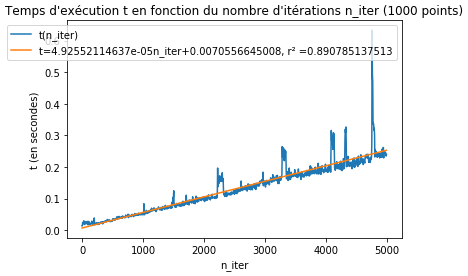

Il a été obtenu avec le code suivant, dont l'exécution n'a pas été réalisée ici car longue :

In [0]:
def cout_n_iter () :
    h = 10
    q = 5
    x=[]  #contient les différentes valeurs de n_iter testées
    y=[]  #contient le temps d'execution associé
    for n_iter in range(1,5000,5) :
        p = Paramètres(q,h,T,m,alpha)
        x.append(n_iter)
        t=time()
        grauwin(p,n_iter)
        t=time()-t
        y.append(t) 
    #Réalisons ensuite une régression linéaire pour trouver a et b tels que t = a*n_iter + b :
    regressor = LinearRegression()
    X = [[i] for i in x]
    regressor.fit(X, y)
    a = regressor.coef_[0]
    b = regressor.intercept_
    r2 = regressor.score(X,y)
    y_droite = [a*i + b for i in x]
    #On trace ensuite les points obtenus en effectuant les simulations, et la droite obtenue par régression linéaire. 
    plt.plot(x,y, label = "t(n_iter)")
    plt.plot(x,y_droite, label = "t="+str(a)+"n_iter+"+str(b)+", r² ="+str(r2))
    plt.title("Temps d'exécution t en fonction du nombre d'itérations n_iter (1000 points)")
    plt.xlabel("n_iter")
    plt.ylabel("t (en secondes)")
    plt.legend()
    plt.show()


2.   En ce qui concerne les dépendances du temps d’exécution avec $h$ et $q$, comme on s’attend à obtenir $O(h^2)$ et $O(q^2)$, on cherche à tracer $log⁡(t)$ en fonction de $log⁡(h)$ et $log⁡(q)$. On s’attend alors à observer des droites de pente $2$. Cette fois, on réalise 30 simulations pour chaque point, afin de calculer le temps moyen d'éxecution.



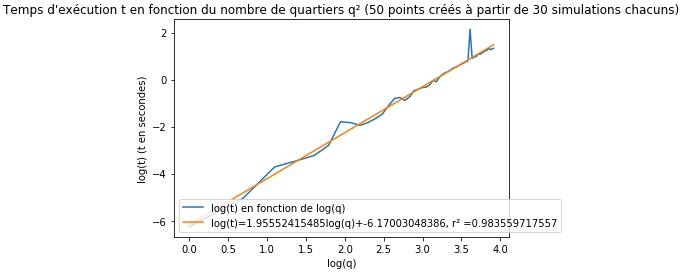

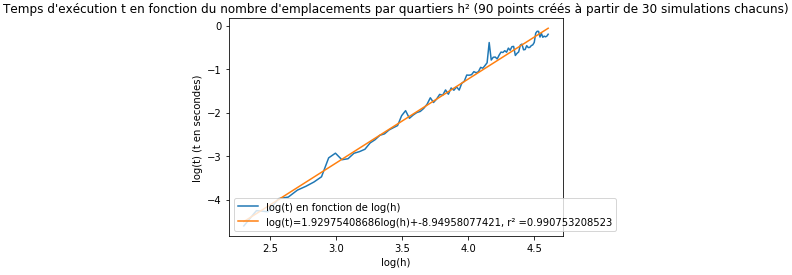

Le premier graphique a été obtenu avec le code suivant (le second a été obtenu avec un algorithme similaire en remplaçant $q$ par $h$). L'exécution n'a pas été réalisée ici car longue :

In [0]:
T = 1
m = 0.2
alpha = 0.2

def cout_q () :   
    h = 20
    x=[]  #contient les différentes valeurs de h testées
    y=[]  #contient le temps d'execution associé
    for q in range(1,51) :
        p = Paramètres(q,h,T,m,alpha)
        x.append(log(q))
        y_moyen = 0
        for i in range(30) : #On réalise 100 simulations pour chaque point
            t=time()
            init_ville(p)   
            t=time()-t
            y_moyen+=t
        y.append(log(y_moyen/30))
    #Réalisons ensuite une régression linéaire pour trouver a et b tels que log(t) = a*log(h) + b :
    regressor = LinearRegression()
    X = [[i] for i in x]
    regressor.fit(X, y)
    a = regressor.coef_[0]
    b = regressor.intercept_
    r2 = regressor.score(X,y)
    y_droite = [a*i + b for i in x]
    #On trace ensuite les points obtenus en effectuant les simulations, et la droite obtenue par régression linéaire. 
    plt.plot(x,y, label = "log(t) en fonction de log(q)")
    plt.plot(x,y_droite, label = "log(t)="+str(a)+"log(q)+"+str(b)+", r² ="+str(r2))
    plt.title("Temps d'exécution t en fonction du nombre de quartiers q² (50 points créés à partir de 30 simulations chacuns)")
    plt.xlabel("log(q)")
    plt.ylabel("log(t) (t en secondes)")
    plt.legend()
    plt.show()

#cout_q()

> *Remarque : On évalue ici directement le temps d’exécution de `init_ville`, car on a déterminé précédemment que la complexité en $h$ et $q$ n’intervient que dans cette fonction. Cela a le double avantage de réduire le temps d’exécution des algorithmes traçant  $log⁡(t)$ en fonction de $log⁡(h)$ et $log⁡(q)$, mais aussi de rendre ce calcul moins précis en supprimant les pics dus aux aléas du choix aléatoire d’un individu et d’un emplacement vide à chaque itération. On remarque en effet que les coefficients de régression linéaires $r^2$ obtenus sont beaucoup plus précis.*

> Toutes les fonctions réalisées ici pourront être trouvées dans le programme `complexite.py` (les fonctions ne s'exécuteront pas automatiquement).

## 2. Simulations et analyses 

Dans cette partie, nous allons étudier l’évolution de l’état d’une ville, d’abord uniquement constituée d’individus égoistes. On s’intéressera à l’effet de la variation des différents paramètres $m$ et $T$. On étudiera dans un second temps l’effet de l’ajout de personnes altruistes dans des configurations menant à une ségrégation.

Dans toute cette partie, nous fixerons donc arbitrairement $h=10$ et $q=5$.


### a) Visualisation d'une simulation pour l'utilisateur

Dans un premier temps, j'ai souhaité réaliser un programme permettant à un utilisateur de visualiser une simulation, non sous forme dynamique (ma console n'arrive pas à les afficher correctement, et il est moins évident de visualiser ce qui se passe), mais sous forme de plusieurs graphiques à intervalle de temps régulier. 

Pour cela, j'ai commencé par une première fonction `dessine_ville` qui prend en argument une ville, les paramètres et le numéro de la figure, et la dessine. J'utilise pour cela la fonction `plt.imshox`, qui trace une grille donnée en argument. L'argument optionnel `cmap` permet de choisir les couleurs utilisées. 

In [0]:
def trace_ville (ville,p,i) :  # i est le numéro de la figure
    
    #On initialise la figure et on règle les axes :
    fig = plt.figure(i)
    ax = plt.axes(xlim=(-0.5, p.l-0.5), ylim=(-0.5, p.l-0.5))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect("equal")
    
    #On trace chacune des frontières des quartiers :
    for j in range(1,p.q) :
        plt.axvline(x=j*p.h-0.5,color='black')
        plt.axhline(y=j*p.h-0.5,color='black')
    
    #On place ensuite les individus :
    if p.alpha == 0 :
        cmap = ListedColormap([(1,1,1),(1,0,0)])
    else :
        cmap = ListedColormap([(1,1,1),(1,0,0),(0,1,0)])
    img = plt.imshow(ville.ville, cmap=cmap)
    plt.title("Etape "+str(i))
    plt.draw()

Ensuite, on crée une fonction `simulation` qui réalise la simulation, et affiche l'état de la ville à intervalle de temps régulier. Elle prend en arguments les paramètres, le nombre d'itérations $i$ et le nombre de graphiques souhaités $n$ (cette méthode impose de choisir $i$ et $n$ de sorte que $i$ soit divisible par $n-1$).

In [0]:
def simulation (p,i_max,nb_graph) :  #choisis de sorte que i_max divisible par (nb_graph-1)
    ville = init_ville(p)
    trace_ville(ville,p,0)
    sub_i = i_max // (nb_graph-1)   # Nombre d'itérations entre chaque graphique
    for i in range(1,nb_graph) :
        for j in range(sub_i) :
            actualise(ville,p)
        trace_ville(ville,p,i) 

> *Remarque : j'ai passé beaucoup de temps sur ces fonctions, ayant du mal à trouver les bonnes fonctions à utiliser. Mon brouillon avec explication de mes essais se trouve dans le programme `simulation_brouillon.py`.*

Par exemple, pour une simulation avec des paramètres quelconques, voici l'affichage obtenu :

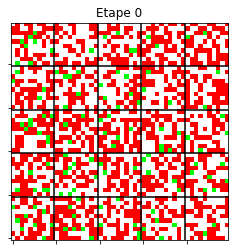

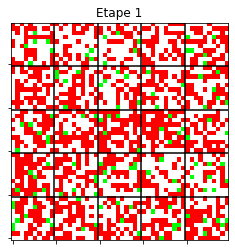

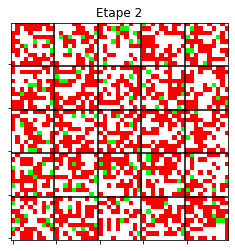

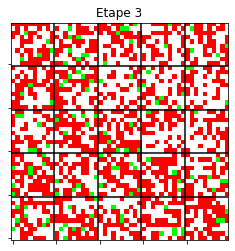

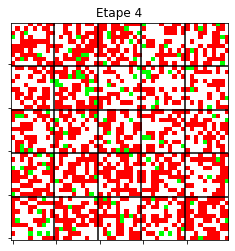

In [0]:
p=Paramètres(5,10,1,0.2,0.1)
simulation(p,8000,5)  #réalise 5 graphiques, espacés chacun de 2000 itérations         
plt.show()  

Enfin, afin de faciliter la prise en main du programme par un utilisateur extérieur, on crée une fonction qui est appelée automatiquement lorsque le programme `simulation.py` est exécuté, et qui demande à l'utilisateur les différents paramètres de la simulation qu'il souhaite effectuer.

In [0]:
def realise_simulation () :
    q = int(input("Racine q du nombre de quartiers (il y aura Q=q² quartiers) : "))
    h = int(input("Racine h du nombre d'emplacements par quartier (il y aura H=h² quartiers) : "))
    T = float(input("Paramètre T représentant les contraintes des individus s'opposant à leur déménagement :"))
    m = float(input("Utilité m d'habiter dans un quartier complètement rempli (0≤m≤1) :"))
    alpha = float(input("Fraction α de la population altruiste :"))
    p = Paramètres(q,h,T,m,alpha)
    i_max = int(input("Nombre i_max d'itérations lors de la simulation :"))
    nb_graph = int(input("Nombre n de graphes souhaités (tel que i_max soit divisible par n-1) :"))
    simulation(p,i_max,nb_graph)

> Toutes les fonctions créées dans cette section pourront être trouvées dans le programme `simulation.py`.

### b) Analyse du rôle du paramètre $T$

Commençons par analyser l’effet de différentes valeurs de $T$ sur l’état final d’une telle ville après $5000$ itérations. Pour cela, on choisit différentes valeurs de $T$ : $0.01, 0.2, 0.5, 1, 20$ et $100$. Pour chacune de ces valeurs, on réalise 200 simulations, et on garde en mémoire les densités finales des quartiers obtenues (on a $7200$ densités pour chaque valeur de $T$). On trace ensuite un histogramme de ces valeurs, pour observer les répartitions finales des habitants du quartier. 

- On observe que pour de très faibles valeurs de $T$, c’est-à-dire pour le cas où les individus font des choix très rationnels (ne déménagent que si cela maximise leur utilité), une forme de ségrégation apparait : à l’état final, on a des quartiers presque pas peuplés, et des quartiers surpeuplés :

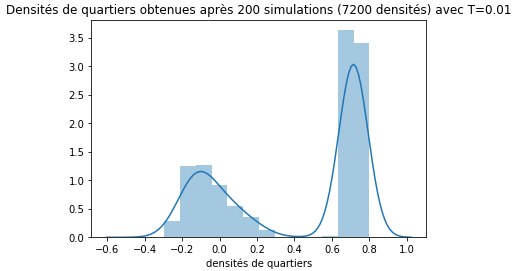

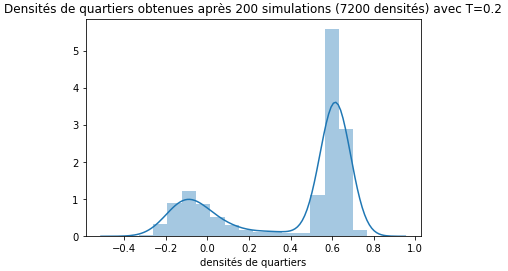

> *Remarque : pour les faibles valeurs de $T$, on voit des densités négatives apparaître sur l’histogramme, je ne sais pas pourquoi, peut-être est-ce dû à des densités trop faibles pour être correctement représentées…*

- Puis, lorsque T augmente, prenant des valeurs intermédiaires, les deux pics ici observés se rapprochent :

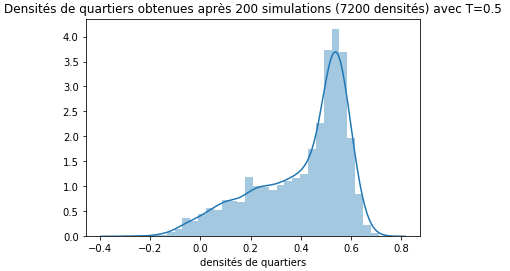

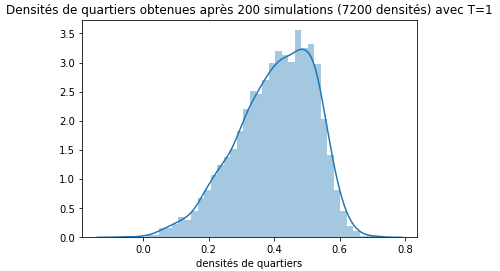

- Lorsque $T$ prend de très grande valeurs, c’est-à-dire quand les choix deviennent irrationnels (déménagement quasi systématique car peu d’ancrage dans son quartier), la répartition des individus devient plus homogène, l’histogramme des densités se resserrant autour de densités avoisinant $0.4$. On pouvait s’y attendre, car avec $T$ très grand, la répartition des individus est quasi aléatoire et indépendante du gain ou de la perte éventuelle d’utilité. 

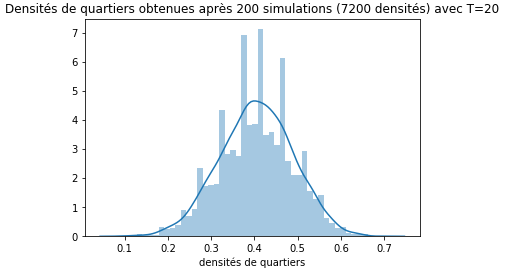

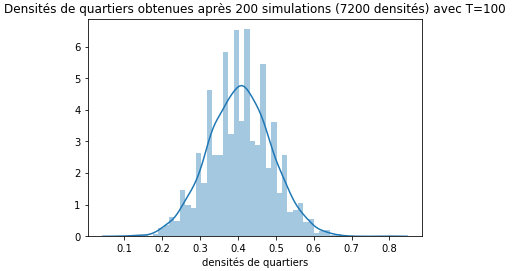

Voici le programme qui nous a permis d'obtenir ces graphiques. Il n'a pas été directement exécuté ici car très long :

In [0]:
h = 10
q = 5
n_iter = 5000
alpha = 0

def analyse_T () :
    m = 0.2  # valeur de m quelconque
    T = [0.01,0.2,0.5,1,20,100]  # Différentes valeurs de T que nous allons tester
    for k in range(6) :
        p = Paramètres(q,h,T[k],m,alpha)
        fig = plt.figure(k)
        densites_finales = [] # Densités obtenues
        for l in range(200) :  # On réalise 200 simulations, on aura donc 7200 densités
            densites = grauwin(p,n_iter).densites
            for i in range(q):
                for j in range(q) :
                    densites_finales.append(densites[i,j])
        sns.distplot(densites_finales, axlabel = "densités de quartiers")
        plt.title("Densités de quartiers obtenues après 200 simulations (7200 densités) avec T="+str(T[k]))
        plt.draw()

> Cette fonction peut être trouvée dans le programme `analyse_T_m.py`.

**Ainsi, le paramètre $T$ peut conduire à la création d’une ségrégation. Quand c’est le cas, $T$ est très faible, c’est-à-dire que les agents font des choix très rationnels, ne déménageant que lorsque cela augmente leur utilité. Ainsi, on remarque que le principe de Main Invisible avancé par Smith ne se vérifie pas dans ce cas : les individus, seulement guidés par la maximisation de leur propre utilité, ne contribuent pas au bien commun, puisqu’au contraire on aboutit à un équilibre non optimal de ségrégation.**

### c) Analyse du rôle du paramètre $m$

Intéressons-nous au rôle du paramètre $m$, niveau d'utilité attribué à un quartier de densité $1$, sur la répartition des individus pour les petites valeurs de $T$. Ce sont en effet ces valeurs qui nous intéressent le plus, car comme vu précédemment pour $T$ grand les individus se répartissent aléatoirement sans que l'utilité n'aie de grande importance. 

Pour cela, on réalise un algorithme similaire au précédent, en choisissant différentes valeurs de T ($0.01$, $0.2$ et $20$), et pour chacune, en réalisant environ 200 simulations pour chacunes des valeurs de $m$ suivantes : $0, 0.2, 0.4, 0.6, 0.8$.

- On constate qu’une augmentation de la valeur de $m$, et donc de l’asymétrie de la fonction d’utilité individuelle $u$, a pour effet de décaler et d’aplatir l’histogramme des fréquences obtenues. La ville, à l’état final, est toujours scindée bien que les densités soient légèrement plus homogènes.   

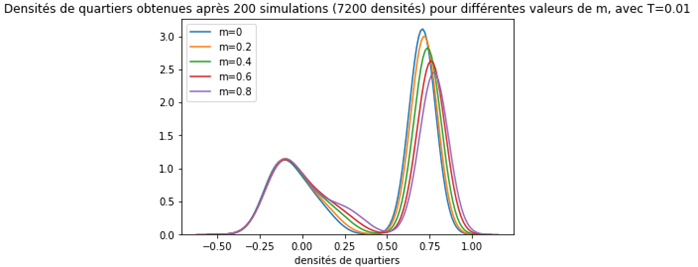

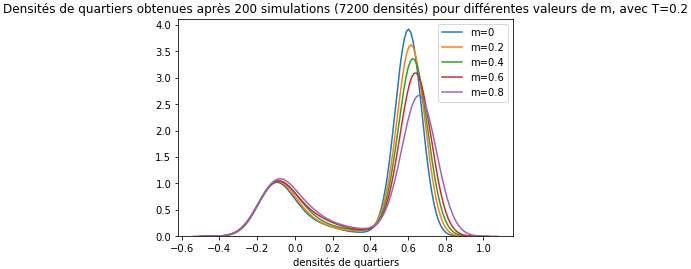

**Ainsi, augmenter $m$ n’a qu’un impact très faible sur la répartition, bien qu’il amène un peu plus de réalisme dans la construction de l’utilité individuelle.**

- Par ailleurs, l’effet de $m$ est, comme attendu, moindre pour les valeurs plus grandes de $T$, comme présenté sur le graphique suivant avec T = 20 :

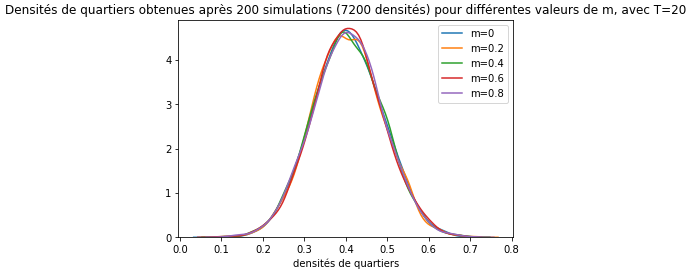

Voici la fonction qui a été appelée pour réaliser les graphiques précédents. Comme précédemment, elle est très longue, c'est pourquoi nous ne l'appelons pas directement ici.

In [0]:
def analyse_m() :
    T = [0.01, 0.2, 100]
    m = [0, 0.2, 0.4, 0.6, 0.8]  # Différentes valeurs de m que nous allons tester
    for k in range(3) :  # indice de la valeur de T
        fig=plt.figure(k)
        for l in range(5) :  # indice de la valeur de m
            p = Paramètres(q,h,T[k],m[l],alpha)
            densites_finales = []
            for n in range(200) :  # On réalise 200 simulations, on aura donc 7200 densités
                densites = grauwin(p,n_iter).densites
                for i in range(q):
                    for j in range(q) :
                        densites_finales.append(densites[i,j])
            sns.distplot(densites_finales, axlabel = "densités de quartiers", label = "m="+str(m[l]), hist = False)
        plt.title("Densités de quartiers obtenues après 200 simulations (7200 densités) pour différentes valeurs de m, avec T="+str(T[k]))
        plt.legend()
        plt.draw()

> Cette fonction peut être retrouvée dans le programme `analyse_T_m.py`.

### d) Effet de l'ajout d'individus altruistes à une ville initialement vouée à la ségrégation

Intéressons-nous aux bénéfices dûs à l’ajout de personnes bienveillantes, qui cherchent directement à maximiser l’utilité agrégée de la ville, dans le cas où les paramètres initiaux conduisaient à une ségrégation. 

On choisit pour cela $T=0.01$ et $m=0.2$. Cette fois, on prend un nombre d’itération plus grand, pour observer l’effet de l’ajout de personnes bienveillantes sur le long terme : $n_{iter}=35 000$. 

- Commençons qualitativement par observer l’effet de l’ajout d’une proportion $α=0,15$ de personnes bienveillantes. On réalise alors les deux simulations suivantes :

In [0]:
# Simulation 1 : sans agents bienveillants, conduisant à une ségrégation :

#p=Paramètres(q,h,T,m,alpha=0)
#simulation(p,35000,8)  # On réalise 8 graphiques, chacun espacés de 5000 itérations       
#plt.show()


# Simulation 2 : avec agents bienveillants

#p=Paramètres(q,h,T,m,alpha=0.15)
#simulation(p,35000,8)  # On réalise 8 graphiques, chacun espacés de 5000 itérations         
#plt.show() 

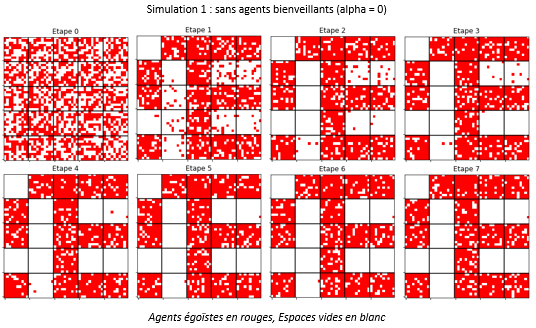

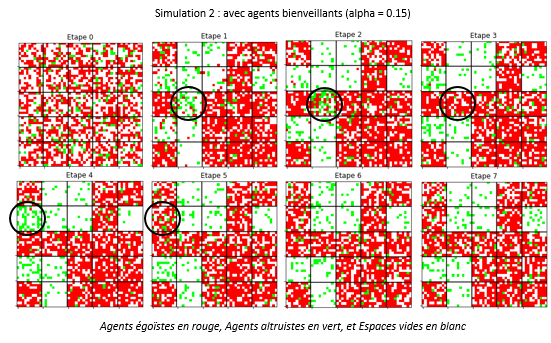

Dans la simulation 1, on constate bien qu’une telle ville constituée uniquement de personnes maximisant leur propre utilité aboutit très rapidement à une ségrégation. A l’étape 1, après 5000 itérations, la population s’est déjà regroupée dans certains quartiers, qui resteront les seuls occupés par la suite. On arrive bien, comme attendu, à un état sous-optimal.

Dans la simulation 2, on ajoute une fraction 0.15 de personnes bienveillantes, qui maximisent l’utilité de la ville. On constate que l’état de ségrégation est ici encore très rapidement formé à l’étape 1. Mais progressivement, les agents bienveillants ont tendance à se regrouper dans un quartier, jusqu’à être assez nombreux pour pouvoir attirer des agents égoïstes, et ainsi remplir progressivement le quartier (cf. quartier entouré aux étapes 1, 2 et 3). Ils recommencent ensuite ce procédé dans un autre quartier (cf. quartier entouré aux étapes 4 et 5). **Ainsi, l’état de la ville s’améliore peu à peu, puisqu’elle tend à devenir de plus en plus homogène. Toutefois, cela s’avère lent, et peut l’être d’autant plus que les déménagements sont aléatoires.**


- De la même manière que pour l’analyse de $T$ et $m$, on trace un histogramme des densités des quartiers de la ville obtenus avec différentes valeurs de $α$. On réalise ici $100$ simulations de $20000$ itérations pour chaque valeur de $α$ :

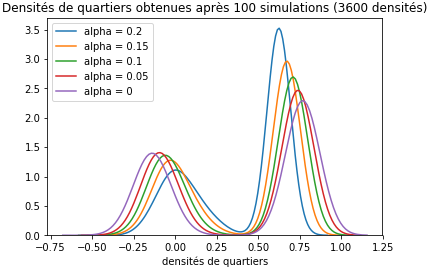

Comme attendu, **l’effet de l’ajout de personnes altruistes, même en faible proportion, améliore significativement l’état de la ville** après les 20000 itérations : on remarque que toutes les courbes obtenues avec des valeurs non nulles de $α$ représentent un meilleur état que celui de ségrégation avec $α = 0$ (courbe bleue). De plus, plus la proportion ajoutée est grande, plus l’état de la ville s’améliore rapidement : les courbes de plus grandes valeurs de $α$ présentent le moins de quartiers vides, et une majorité de quartier dont la densité s’approche des 0,5.

Voici la fonction qui a permis de réaliser le graphique précédent (elle est elle aussi très longue) :

In [0]:
def analyse_alpha () :
    alpha = [0.2, 0.15, 0.1, 0.05, 0]  # Différentes valeurs de alpha que nous allons tester (on s'arrête à 20% car les altruistes sont censés restés très minoritaires dans ce modèle). 
    # Elles sont classées dans l'ordre décroissant car les pics des courbes sont plus hauts pour les grandes valeurs de alpha, et l'axe des ordonnées doit être créé par rapport à ces pics.
    for k in range(5) :
        p = Paramètres(q,h,T,m,alpha[k])
        densites_finales = [] # Densités obtenues
        for l in range(100) :  # On réalise 200 simulations, on aura donc 3600 densités
            densites = grauwin(p,20000).densites
            for i in range(q):
                for j in range(q) :
                    densites_finales.append(densites[i,j])
        sns.distplot(densites_finales, axlabel = "densités de quartiers", label = "alpha = "+str(alpha[k]), hist=False)
    plt.title("Densités de quartiers obtenues après 100 simulations (3600 densités)")
    plt.legend()

> *Remarque : On pourrait imaginer une méthode d’itération légèrement différente, de sorte que les altruistes ne se 	voient pas proposer un déménagement aléatoire, mais déménagent directement vers le quartier qui 	maximisera le plus l’utilité agrégée. Ainsi, les personnes altruistes pourront par exemple se coordonner, et 	toutes cibler le même quartier vide à remplir. Leur action serait alors beaucoup plus efficace.*

> Les fonctions de cette section peuvent être retrouvées dans le programme `analyse_alpha.py`.

## Evaluation du modèle

### a) Un modèle qui généralise et complète celui de Schelling

Le modèle de Grauwin et Jensen étudié ici a l’avantage d’être plus complexe dans son principe que celui de Schelling :
- Il prend en compte d’autres contraintes liées à l’ancrage des individus dans leur quartier, qui affectent la rationalité de leurs choix. 

- Les déménagements ne sont également plus systématiques en cas de maximisation de l'utilité, ce qui amène un peu plus de réalisme. On ne considère plus un choix binaire, avec déménagement si on dépasse un seuil de tolérance, et on ajoute une fonction d'utilité qui permet aux individus de maximiser progressivement leur utilité : dans le modèle de Schelling, un individu dont le seuil de tolérance est 0,5 et vivant entouré d'une fraction 0,1 d'individus similaires refusera un déménagement vers un voisinage ayant une fraction 0,3 d'individus similaires, alors que cela améliorerait déjà sa situation. 

- La ville est également étudiée sous forme de quartiers, et les densités de populations considérées s'étendent aux quartiers plutôt qu'au voisinage le plus direct, ce qui est plus conforme à la réalité.

- On peut, à l'aide du paramètre $α$, on peut calculer la part de la population représentée par la seconde classe.

Pour retomber sur le modèle de Schelling, on pourrait très bien assimiler la fonction d'utilité $u$ des individus à leur préférence en fonction de la densité $ρ_{similaire}$ d'individus similaires d'un quartier. Le coût en mémoire serait légèrement plus important, nécessitant de créer une matrice de densités pour chaque type de population, mais sa complexité temporelle resterait similaire. 


### b) Confrontation à la réalité

Le modèle de ségrégation spatiale de Grauwin et Jensen présente une forme de ségrégation spatiale très théorique et abstraite. Il est difficile en pratique de représenter une ville réelle, d'"évaluer" le paramètre de contraintes $T$ et de connaitre la forme de la fonction d'utilité des individus. Toutefois, il permet de mieux comprendre le rôle de ces paramètres les uns par rapport aux autres, et d'apporter une éventuelle solution pour remédier aux états de ségrégation, à savoir une intervention extérieure organisant le territoire. 

Face à une urbanisation importante et une augmentation de la population, la gestion de l'étalement urbain est par exemple devenue primordiale dans les politiques publiques françaises. De nombreuses infrastructures permettent de rendre plus attractif un territoire, et d'attirer une population, comme la construction de zones commerciales, le développement des transports en commun ou la mise en place d'aides au logement préférentielles. 

On peut par exemple citer l'étude de l'effet du développement du réseau ferroviaire en Ile-de-France entre 1990 et 2004 présenté par l'INSEE en 2016. La carte ci-dessous présente l'étalement du réseau effectué entre ces dates :

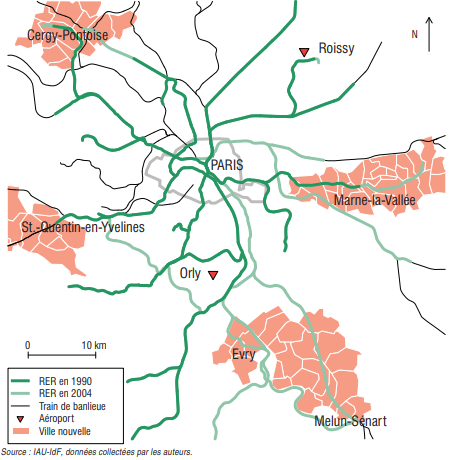

Le développement du réseau ferroviaire a dynamisé les territoires éloignés de Paris, avec la création de villes nouvelles. On peut constater dans le tableau suivant que la population à proximité de Paris a diminué tandis qu'elle a augmenté dans les territoires les plus éloignés :

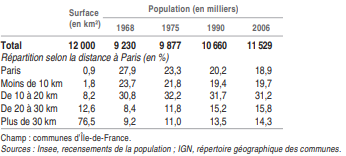

> Voici le lien des données de l'étude de l'INSEE présentée : [Comment les transports publics modifient-ils le développement des villes ?](https://www.insee.fr/fr/statistiques/2122713)

Ainsi, l'aménagement du territoire a un impact similaire au rôle de l'ajout d'individus altruistes pour dynamiser des zones aux faibles densités de populations. 

### c) Un modèle qui présente quelques lacunes

Tout comme le modèle de Schelling, ce nouveau modèle présente quelques lacunes :
- Il représente des individus identiques et n’interagissant pas entre eux. Cela reste peu conforme à la réalité, puisque les individus ne présentent pas tous les mêmes aversions au déménagement, et la même fonction d'utilité. L'ajout de ces différences représenterait surtout un coût en mémoire, puisqu'il faudrait représenter chaque individu de la ville sous la forme d'un vecteur contenant ses spécificités, plutôt que sous la simple forme d'un entier. 

- Les déménagements sont, comme dans le modèle de Schelling, proposés aléatoirement. Dans la réalité, on peut supposer qu'un individu insatisfait préfèrerait choisir directement le quartier maximisant le plus son utilité. Ainsi, on devrait observer une ségrégation moins importante. Mais dans ce cas, il convient d'intégrer les prix de l'immobilier dans l'attractivité des territoires. Un quartier très peuplé est parfois moins accessible car plus cher, et on observe en réalité un étalement urbain du à la volonté d'accès à la propriété. 

Il existe des modèles beaucoup plus complexes permettant de simuler l'étalement urbain, qui s'adaptent directement à la zone étudiée et prennent en compte des données d'entrée plus importantes, comme le coût des transports, les taxes, les contraintes d'occupations du territoire, ... Ces modèles testent des scénarios et évaluent leur probabilité, comme par exemple le modèle SLEUTH (*Slope, Land Cover, Excluded, Urban, Transportation, Hillshade*). Ce sont aussi des modèles appelés "automates cellulaires", qui actualisent pas à pas une ville sous la forme d'une grille, comme nous avons pu le faire dans nos modèles. Ils se basent sur des données passées et des scénarios qui leur sont soumis pour prédire ce qui pourrait se passer dans le futur.  

---

Bien que les modèles que nous avons choisi d'étudier soient plus modestes, et simples dans leur principe de fonctionnement, ils permettent toutefois de comprendre certains phénomènes, et de mettre en avant les effets macroscopiques qui se dégagent de comportements microscopiques.

# Bilan personnel 

Cette section regroupe brièvement nos remarques concernant le déroulement du projet, les difficultés rencontrées et les enseignements tirés. 

* Nous n'avions jamais réalisé de projet d'informatique à plusieurs, et nous ne savions d'abord pas comment nous organiser au mieux. La réalisation d'un Notebook partagé, et le dépot de fonctions sur Github se sont révélés très efficaces pour nous organiser et nous partager rapidement du code. Il a également été plus efficace pour nous de travailler sur deux modèles différents, en échangeant régulièrement et en s'aidant mutuellement, car nous ne codions pas au même rythme, et il est difficile de reprendre le travail d'un autre, de s'adapter à ses variables, sa manière de coder, ...

* Travailler sur un projet à deux plutôt que seul a été bénéfique, car on pouvait s'aider mutuellement, et avoir un autre avis sur ce que l'on code peut aider à voir les choses différemment, à envisager d'autres manières de coder, d'autres choses à ajouter. De plus, l'écart de niveau et d'expérience a permis une dynamique d'entraide au sein du groupe. 

* Pour ma part (Solène), ayant déjà appris à coder avant, on ne m'avait pas enseigné l'usage des classes en Python, et le rôle des tests unitaires. Mais dans ce projet, cela a vraiment été bénéfique, les classes permettant de synthétiser les données en une entité plutôt que de devoir les reciter dans chaque fonction. Les tests unitaires m'ont également permis de m'apercevoir facilement d'erreurs d'indiçage ou de fonctionnement des fonctions, qui ne renvoyaient pas d'erreurs car syntaxiquement justes mais n'effectuaient pas le bon traitement. 

* De mon côté (Victor), j'ai trouvé ce projet très formateur. En tant qu'1A-ECO, je n'ai jamais connu Python avant cette année, et les heures de programmation que j'ai reçues au premier semestre étaient contreproductives pour être honnête : au lieu de pratiquer, nous étions amenés à réaliser des exposés sur des algorithmes extrêmement compliqués alors que nous n'avions encore aucune expérience dans le domaine. Au contraire, ce projet m'a permis d'avancer à mon propre rythme, expérimenter, et apprendre en cherchant des fonctions pré-existant dans des modules lorsque j'en avais besoin. 

